## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve  
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import catboost as cat
from catboost import CatBoostClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [3]:
#pip list

## Read IDS dataset

In [4]:
#cd "/scratch/project_2004883/Project 1/data/"

In [5]:
#ls

In [6]:
df = pd.read_csv('IDS (17,18,19).csv')

In [7]:
df.shape 

(424225, 76)

In [8]:
df

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,978,1,1,45.0,111.0,45.0,45.0,45.000000,0.000000,...,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
1,1,52299,5,4,286.0,170.0,103.0,0.0,57.200000,52.485236,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
2,2,1661883,8,7,1148.0,1581.0,677.0,0.0,143.500000,228.129662,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
3,3,62376405,10,11,437.0,1770.0,431.0,0.0,43.700000,136.084165,...,20,35989.166667,12863.177359,62246.0,30718.0,1.012634e+07,45486.257852,10172110.0,10078367.0,0
4,4,5152055,10,7,573.0,3025.0,318.0,0.0,57.300000,108.242577,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424220,695558,11512204,8,5,326.0,11632.0,326.0,0.0,40.750000,115.258405,...,32,892.000000,0.000000,892.0,892.0,6.507197e+06,0.000000,6507197.0,6507197.0,9
424221,695559,11513325,5,5,471.0,3525.0,471.0,0.0,94.200000,210.637604,...,32,918.000000,0.000000,918.0,918.0,6.508582e+06,0.000000,6508582.0,6508582.0,9
424222,695560,11509201,7,6,314.0,11632.0,314.0,0.0,44.857143,118.680845,...,32,899.000000,0.000000,899.0,899.0,6.503248e+06,0.000000,6503248.0,6503248.0,9
424223,695561,11509095,8,5,369.0,11632.0,369.0,0.0,46.125000,130.461201,...,32,914.000000,0.000000,914.0,914.0,6.504954e+06,0.000000,6504954.0,6504954.0,9


In [9]:
df = df.drop(columns=["Unnamed: 0"])

In [10]:
#df.info()

In [11]:
#df.describe

In [12]:
#df.value_counts()

In [13]:
#14    76924
#7     51801
#15    41365
#13    39636
#16    36071
#3     27688
#1     27264
#2     23156
#12    19516
#8     16786
#0     15477
#4     14370
#5     10065
#6      9597
#9      7993
#10     6505
#11       11

In [14]:
df.Label.value_counts()

23    76924
9     51801
25    41365
22    39636
26    36071
3     27688
1     27264
2     23156
18    19516
10    16786
0     15477
4     14370
5     10065
6      9597
15     7993
16     6505
17       11
Name: Label, dtype: int64

In [15]:
#0: Benign
#1:DDOS attack-HOIC (2018)
#2:DDoS attacks-LOIC-HTTP (2018)
#3:DoS Hulk (2017), DoS attacks-Hulk (2018)
#4:Bot (2017,2018)
#5: FTP-Patator (17), FTP-BruteForce (18)
#6: SSH-Bruteforce (18), SSH-Patator (17)
#7: ?????????????????????????????????????
#8: ?????????????????????????????????????
#9: DoS attacks-GoldenEye (18), DoS GoldenEye (17)
#10:DoS slowloris (17), DoS attacks-Slowloris (18)
#11:?????????????????????????????????????
#12:?????????????????????????????????????
#13:?????????????????????????????????????
#14:????????????????????????????????????? 
#15: PortScan (17)
#16:DDoS (17)
#17:Heartbleed (17)
#18:TFTP (19)
#19:?????????????????????????????????????
#20:?????????????????????????????????????
#21:?????????????????????????????????????
#22:DrDoS_NetBIOS 19
#23:DrDoS_SSDP 19
#24:?????????????????????????????????????
#25:Syn 19
#26:DrDoS_NTP 19



#14    76924 DrDoS / SSSDP
#7     51801 DoS   / GoldenEye
#15    41365 Syn   / Syn 
#13    39636 DrDoS / NetBIOS
#16    36071 DrDoS / NTP
#3     27688 DoS   / Hulk
#1     27264 DDOS  / HOIC
#2     23156 DDoS  / LOIC-HTTP
#12    19516 TFTP  / TFTP
#8     16786 DoS   / slowloris
#0     15477 Benign / Benign
#4     14370 Botnets   / Bot
#5     10065 BruteForce  / FTP-Patator 
#6      9597 BruteForce / SSH-Patator
#9      7993 Sniffing  /  PortScan
#10     6505 #DDoS for CIC-IDS-2017
#11       11  DoS / Heartbleed 

In [60]:
#23:DrDoS_SSDP 19
#9: DoS attacks-GoldenEye (18), DoS GoldenEye (17)
#25:Syn 19 
#22:DrDoS_NetBIOS 19
#26:DrDoS_NTP 19
#3:DoS Hulk (2017), DoS attacks-Hulk (2018)
#1:DDOS attack-HOIC (2018)
#2:DDoS attacks-LOIC-HTTP (2018)
#18: TFTP (19) 
#10:DoS slowloris (17), DoS attacks-Slowloris (18)
#0: Benign
#4:Bot (2017,2018)
#5: FTP-Patator (17), FTP-BruteForce (18)
#6: SSH-Bruteforce (18), SSH-Patator (17)
#15: PortScan (17)
#16:DDoS (17)
#17:Heartbleed (17)
    
    
    
#0: Benign
    
#15: PortScan (17)
#16:DDoS (17)
#17:Heartbleed (17)  

#1:DDOS attack-HOIC (2018)
#2:DDoS attacks-LOIC-HTTP (2018)
    
#5: FTP-Patator (17), FTP-BruteForce (18)
#6: SSH-Bruteforce (18), SSH-Patator (17)
#4:Bot (2017,2018)
#10:DoS slowloris (17), DoS attacks-Slowloris (18)
#3:DoS Hulk (2017), DoS attacks-Hulk (2018)
#9: DoS attacks-GoldenEye (18), DoS GoldenEye (17)
    
#18: TFTP (19)
#23:DrDoS_SSDP 19
#25:Syn 19 
#22:DrDoS_NetBIOS 19
#26:DrDoS_NTP 19
#UDP        375394
#MSSQL      290578
#LDAP          560


#UDP        375394
#MSSQL      290578
#Syn        214258
#NetBIOS    172729
#BENIGN       2312
#LDAP          560


Class 0, 11, 12, 13

Benign, Heartbleed, TFTP, NetBIOS

SyntaxError: invalid syntax (<ipython-input-60-ba8470c001b7>, line 55)

In [59]:
#UDP        375394
#MSSQL      290578
#LDAP          560

In [18]:
#25:Syn 19 
#22:DrDoS_NetBIOS 19

In [19]:
df.shape

(424225, 75)

In [20]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [21]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [22]:
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [23]:
df.Label.value_counts()

14    76924
7     51801
15    41365
13    39636
16    36071
3     27688
1     27264
2     23156
12    19516
8     16786
0     15477
4     14370
5     10065
6      9597
9      7993
10     6505
11       11
Name: Label, dtype: int64

# Graphs

In [24]:
le = preprocessing.LabelEncoder()

def learn_curve(X,y,c,m):
    
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() 
    y = le.fit_transform(y)

    model = m

    lr = Pipeline(steps=(['scaler',sc], ['classifier',model]))
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) 
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) 
    
    lr.fit(X,y) 

    train_score = lr.score(X,y) 
    
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1) 
    test_scores = 1-np.mean(test_scores,axis=1) 
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores":cv_scores, "train_score":train_score, "learning_curve":lc}

In [25]:
def print_graph (lc):
  
    print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
    Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
    Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
    Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
    plt.rcParams['figure.figsize'] = (6, 4)

    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    plt.title("")
    plt.ylabel("Misclassification Rate/Loss");

In [26]:
def print_graph (lc):
    
    fig = plt.figure(figsize=(6,4))    
    plt.rcParams["figure.autolayout"] = True
    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    
    #plt.xlim([100000, 900000])
    #plt.ylim([0,  0.014])
    
    fig.autofmt_xdate()
    
    plt.title("Learning Curve of Good Fit Model")
    plt.ylabel("Misclassification Rate/Loss");

In [27]:
%%time
rf = RandomForestClassifier().fit(X_train,y_train)
rf_test = rf.predict(X_test)
rf_train=rf.predict(X_train)

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, rf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, rf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, rf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, rf_test, average='weighted')))
print(" ")
print(classification_report(y_test,rf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, rf_test, average=None)))

Accuracy of Random Forest: 0.9974895397489539
Precision of Random Forest: 0.997491493818219
Recall of Random Forest: 0.9974895397489539
Average F1 of Random Forest: 0.997487384186983
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3095
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       0.99      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1920
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
          13       1.00      1.00      1.00      7927
    

Cross Validation Accuracies:
-------------------------
[0.996920855678001, 0.9972891743768048, 0.9975838293358478, 0.9968471919382403, 0.9975543638399434]

    Mean Cross Validation Accuracy:
-------------------------
0.9972390830337675

    Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0003084180354323802

    Training Accuracy:
---------------
0.9992221109081266




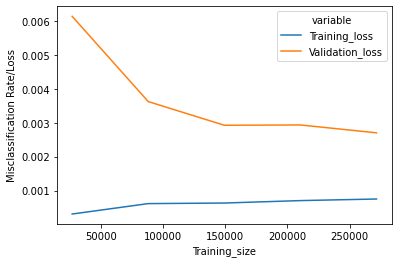

In [30]:
lcrf = learn_curve(X_train,y_train,1,rf) 
print_graph(lcrf)

In [17]:
%%time
xgb = xgb.XGBClassifier().fit(X_train, y_train)
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, xgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, xgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, xgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, xgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,xgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, xgb_test, average=None)))

[21:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9998703518180211
Precision of XGBoost: 0.9998703624515408
Recall of XGBoost: 0.9998703518180211
Average F1 of XGBoost: 0.9998703533505202
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3095
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1920
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      

[09:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

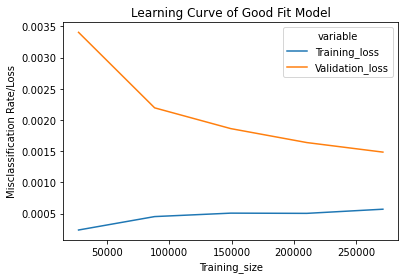

In [28]:
lc = learn_curve(X_train,y_train,1,xgb) 
print_graph(lc)

# Feature Selection

In [26]:
#df = df.drop(columns=["Fwd Byts/b Avg", "Fwd Pkts/b Avg", "Fwd Blk Rate Avg", "Bwd Byts/b Avg", "Bwd Pkts/b Avg", "Bwd URG Flags",
                      "Bwd Blk Rate Avg"])

<AxesSubplot:>

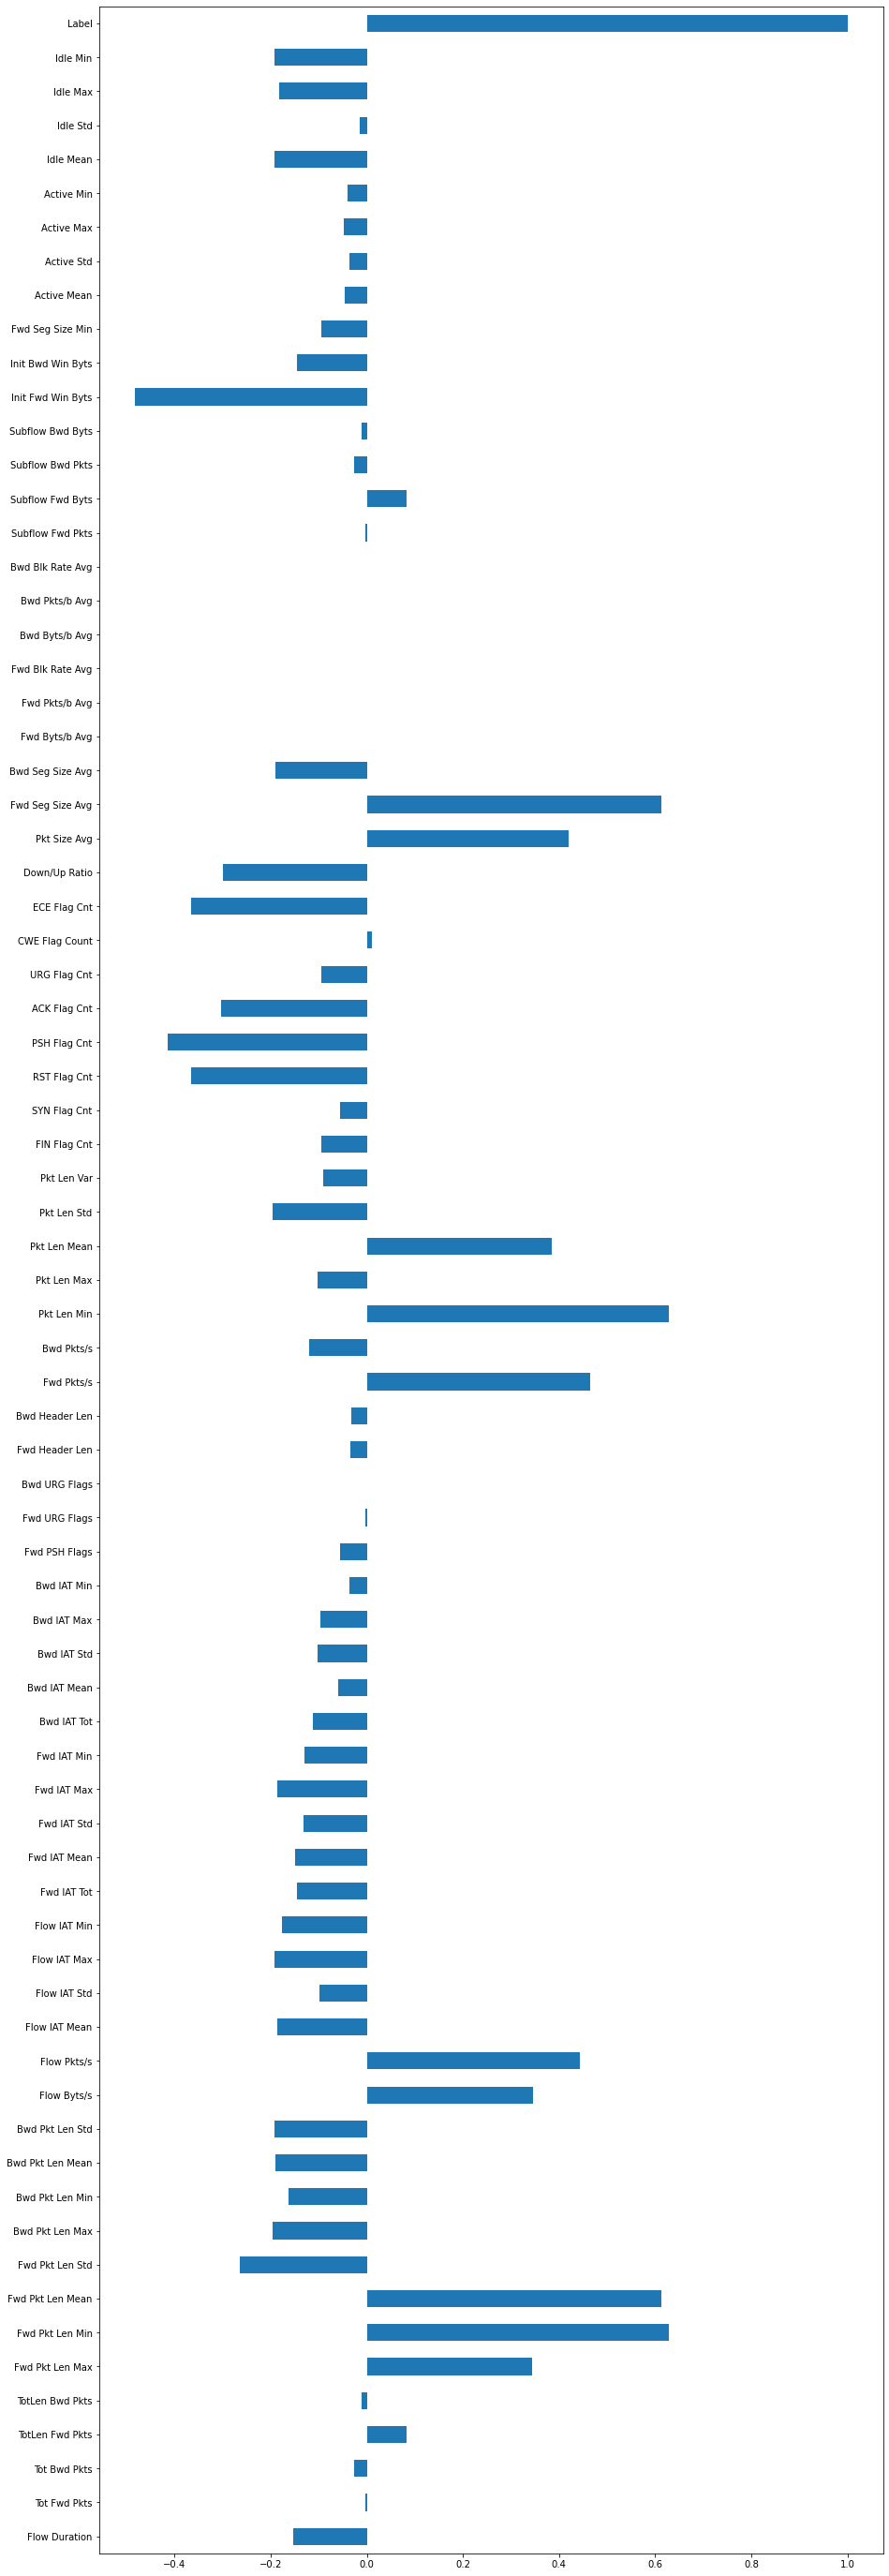

In [27]:
# correlation between target and features
(df.corr().loc['Label']
 .plot(kind='barh', figsize=(15,50)))

In [28]:
# drop numeric features  not correlation with the target (threshold <0.2)
corr = abs(df.corr().loc['Label'])
corr = corr[corr<0.23]
cols_to_drop = corr.index.to_list()
df = df.drop(cols_to_drop, axis=1)

In [29]:
df.shape

(424225, 25)

In [30]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(n_estimators=250,random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=0)

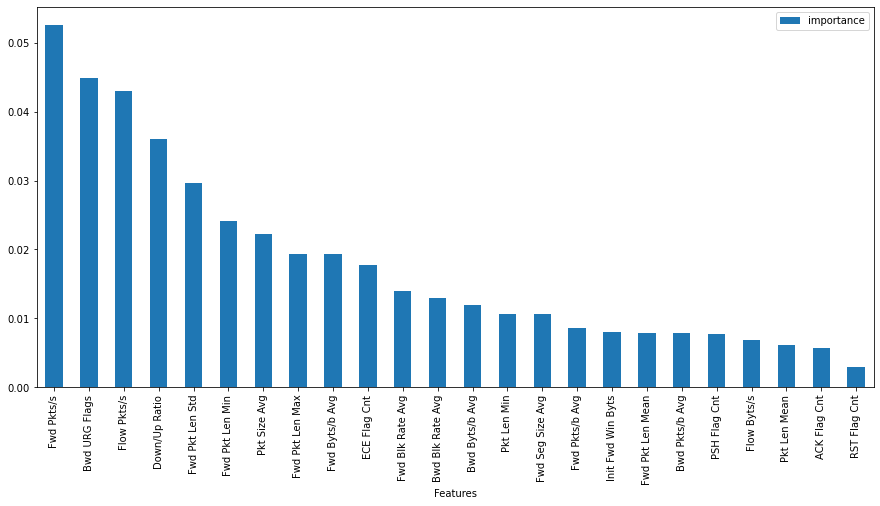

In [31]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
refclasscol=list(df.columns.values)
impocol = pd.DataFrame({'Features':refclasscol[0:24],'importance':importances[0:24]})
impocol = impocol.sort_values('importance',ascending=False).set_index('Features')

plt.rcParams['figure.figsize'] = (15, 7)
impocol.plot.bar();

In [32]:
#impocol.head(29)

In [33]:
#impocol.tail(46)

In [34]:
#df = df.drop(columns=["Fwd Byts/b Avg", "Bwd URG Flags", "Fwd Pkts/b Avg", "Fwd Blk Rate Avg", "Bwd Byts/b Avg", 
#                      "Bwd Pkts/b Avg", "Bwd Blk Rate Avg", "Fwd URG Flags", "Fwd Header Len", "Fwd Header Len",
#                      "CWE Flag Count", "Fwd Seg Size Min", "Active Min", "Active Std", "FIN Flag Cnt", "Active Mean",
#                      "Active Max", "SYN Flag Cnt", "Fwd PSH Flags", "Idle Std", "Down/Up Ratio", "Idle Min", "Idle Max",
#                      "Idle Mean", "URG Flag Cnt", "Bwd Pkt Len Min", "Bwd IAT Min", "RST Flag Cnt", "Bwd IAT Std", 
#                      "ECE Flag Cnt", "Bwd IAT Max", "Bwd Pkt Len Max", "Bwd IAT Tot", "Subflow Bwd Byts", "Bwd Pkt Len Std",
#                      "TotLen Bwd Pkts", "Bwd Pkts/s", "Subflow Bwd Pkts", "Bwd Seg Size Avg", "Bwd Pkt Len Mean", 
#                      "Fwd IAT Min", "PSH Flag Cnt", "Bwd IAT Mean", "ACK Flag Cnt", "Fwd IAT Std", "Init Bwd Win Byts",
#                      "Fwd Pkt Len Std"])

In [35]:
impocol.head(25)

,importance
Features,
Fwd Pkts/s,0.052546
Bwd URG Flags,0.044819
Flow Pkts/s,0.043001
Down/Up Ratio,0.036046
Fwd Pkt Len Std,0.029613
Fwd Pkt Len Min,0.024196
Pkt Size Avg,0.022275
Fwd Pkt Len Max,0.019412
Fwd Byts/b Avg,0.019357


In [36]:
impocol.tail(5)

,importance
Features,
PSH Flag Cnt,0.007781
Flow Byts/s,0.006838
Pkt Len Mean,0.006156
ACK Flag Cnt,0.005696
RST Flag Cnt,0.002967


In [37]:
df = df.drop(columns=["RST Flag Cnt", "ACK Flag Cnt", "Pkt Len Mean", "Flow Byts/s", "PSH Flag Cnt"])

In [38]:
df.shape #After Feature selection(424225, 20)

(424225, 20)

In [39]:
X_train.shape #(339380, 74)

(339380, 74)

In [40]:
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [41]:
df.shape

(424225, 20)

In [42]:
X_train.shape

(339380, 19)

# SMOTE (Synthetic Minority Oversampling Technique)

In [43]:
df.Label.value_counts()

14    76924
7     51801
15    41365
13    39636
16    36071
3     27688
1     27264
2     23156
12    19516
8     16786
0     15477
4     14370
5     10065
6      9597
9      7993
10     6505
11       11
Name: Label, dtype: int64

In [44]:
pd.Series(y_train).value_counts()

14    61539
7     41441
15    33092
13    31709
16    28857
3     22150
1     21811
2     18525
12    15613
8     13429
0     12382
4     11496
5      8052
6      7677
9      6394
10     5204
11        9
dtype: int64

In [45]:
smote=SMOTE(n_jobs=-1,sampling_strategy={5:11496, 6:11496, 9:11496 , 10:11496, 11:11496})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [46]:
df.shape

(424225, 20)

In [47]:
pd.Series(y_train).value_counts()

14    61539
7     41441
15    33092
13    31709
16    28857
3     22150
1     21811
2     18525
12    15613
8     13429
0     12382
4     11496
9     11496
6     11496
5     11496
10    11496
11    11496
dtype: int64

# Test right Feature selection

In [51]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'random_state': int(params['random_state']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    
    HPOrf = RandomForestClassifier( **params)
    HPOrf.fit(X_train,y_train)
    y_pred = HPOrf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'random_state': hp.quniform('random_state', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 29, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

bestHPOrf = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(bestHPOrf))

100%|██████████| 20/20 [16:42<00:00, 50.13s/trial, best loss: -0.9982556426424657]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 32.0, 'max_features': 24.0, 'min_samples_leaf': 1.0, 'min_samples_split': 4.0, 'n_estimators': 108.0, 'random_state': 184.0}


In [ ]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

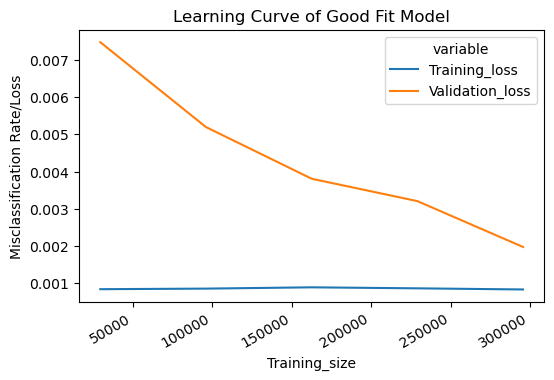

In [53]:
lcHPOrf = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lcHPOrf)

In [68]:
%%time
HPOrf = RandomForestClassifier(criterion='entropy', max_depth=36, max_features=19, min_samples_leaf=3, 
                               min_samples_split=7, n_estimators=27, random_state= 106).fit(X_train, y_train)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)

HPOrf_score=HPOrf.score(X_test,y_test)

HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)

y_predict=HPOrf.predict(X_test)
y_true=y_test

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))

# Calculate confusion matrix
cm = confusion_matrix(y_test, HPOrf_test)

# Assuming 'num_classes' is the number of classes in your dataset
num_classes = len(np.unique(y_test))

# Initialize arrays to store TP, TN, FP, and FN for each class
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

# Calculate TP, TN, FP, FN for each class
for i in range(num_classes):
    TP[i] = cm[i, i]
    FN[i] = np.sum(cm[i, :]) - TP[i]
    FP[i] = np.sum(cm[:, i]) - TP[i]
    TN[i] = np.sum(cm) - (TP[i] + FP[i] + FN[i])

# Print metrics for each class
for i in range(num_classes):
    print(f"Class {i} - True Positives (TP): {TP[i]}, True Negatives (TN): {TN[i]}, False Positives (FP): {FP[i]}, False Negatives (FN): {FN[i]}")
    
print(" ")
print(classification_report(y_test, HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

Accuracy of Random Forest: 0.9980670634686781
Precision of Random Forest: 0.9980715573927054
Recall of Random Forest: 0.9980670634686781
Average F1 of Random Forest: 0.9980670952780167
Class 0 - True Positives (TP): 3054.0, True Negatives (TN): 81719.0, False Positives (FP): 31.0, False Negatives (FN): 41.0
Class 1 - True Positives (TP): 5453.0, True Negatives (TN): 79391.0, False Positives (FP): 1.0, False Negatives (FN): 0.0
Class 2 - True Positives (TP): 4631.0, True Negatives (TN): 80213.0, False Positives (FP): 1.0, False Negatives (FN): 0.0
Class 3 - True Positives (TP): 5532.0, True Negatives (TN): 79299.0, False Positives (FP): 8.0, False Negatives (FN): 6.0
Class 4 - True Positives (TP): 2868.0, True Negatives (TN): 81964.0, False Positives (FP): 7.0, False Negatives (FN): 6.0
Class 5 - True Positives (TP): 2013.0, True Negatives (TN): 82831.0, False Positives (FP): 1.0, False Negatives (FN): 0.0
Class 6 - True Positives (TP): 1919.0, True Negatives (TN): 82923.0, False Positi

In [51]:
%%time
HPOrf = RandomForestClassifier(criterion='entropy', max_depth=36, max_features=19, min_samples_leaf=3, 
                               min_samples_split=7, n_estimators=27, random_state= 106).fit(X_train, y_train)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)

HPOrf_score=HPOrf.score(X_test,y_test)

HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)

y_predict=HPOrf.predict(X_test)
y_true=y_test

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

Accuracy of Random Forest: 0.9980670634686781
Precision of Random Forest: 0.9980715573927054
Recall of Random Forest: 0.9980670634686781
Average F1 of Random Forest: 0.9980670952780167
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3095
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1920
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       0.67      1.00      0.80         2
          12       1.00      0.99      1.00      3903
          13       1.00      1.00      1.00      7927
  

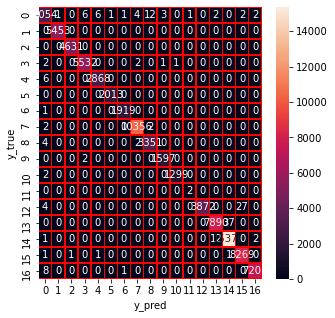

In [54]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [53]:
cm = confusion_matrix(y_true, y_predict)

# Assuming 'num_classes' is the number of classes in your dataset
num_classes = len(np.unique(y_true))

# Initialize arrays to store TP, TN, FP, and FN for each class
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

# Calculate TP, TN, FP, FN for each class
for i in range(num_classes):
    TP[i] = cm[i, i]
    FN[i] = np.sum(cm[i, :]) - TP[i]
    FP[i] = np.sum(cm[:, i]) - TP[i]
    TN[i] = np.sum(cm) - (TP[i] + FP[i] + FN[i])

In [56]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import numpy as np

In [57]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_predict)

# Assuming 'num_classes' is the number of classes in your dataset
num_classes = len(np.unique(y_true))

# Initialize arrays to store TP, TN, FP, and FN for each class
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

# Calculate TP, TN, FP, FN for each class
for i in range(num_classes):
    TP[i] = cm[i, i]
    FN[i] = np.sum(cm[i, :]) - TP[i]
    FP[i] = np.sum(cm[:, i]) - TP[i]
    TN[i] = np.sum(cm) - (TP[i] + FP[i] + FN[i])

# Calculate other metrics for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict, average=None)

# Print metrics for each class
for i in range(num_classes):
    print(f'Class {i} - True Positives (TP): {TP[i]}, True Negatives (TN): {TN[i]}, False Positives (FP): {FP[i]}, False Negatives (FN): {FN[i]}')
    print(f'Class {i} - Precision: {precision[i]}, Recall: {recall[i]}, F1-score: {fscore[i]}')

Class 0 - True Positives (TP): 3054.0, True Negatives (TN): 81719.0, False Positives (FP): 31.0, False Negatives (FN): 41.0
Class 0 - Precision: 0.9899513776337115, Recall: 0.9867528271405492, F1-score: 0.9883495145631067
Class 1 - True Positives (TP): 5453.0, True Negatives (TN): 79391.0, False Positives (FP): 1.0, False Negatives (FN): 0.0
Class 1 - Precision: 0.9998166483314999, Recall: 1.0, F1-score: 0.9999083157605207
Class 2 - True Positives (TP): 4631.0, True Negatives (TN): 80213.0, False Positives (FP): 1.0, False Negatives (FN): 0.0
Class 2 - Precision: 0.9997841105354058, Recall: 1.0, F1-score: 0.9998920436143798
Class 3 - True Positives (TP): 5532.0, True Negatives (TN): 79299.0, False Positives (FP): 8.0, False Negatives (FN): 6.0
Class 3 - Precision: 0.9985559566787003, Recall: 0.9989165763813651, F1-score: 0.9987362339772521
Class 4 - True Positives (TP): 2868.0, True Negatives (TN): 81964.0, False Positives (FP): 7.0, False Negatives (FN): 6.0
Class 4 - Precision: 0.997

In [62]:
average_FP = np.mean(FP)
average_FN = np.mean(FN)

print('Average False Positives (FP) across all classes:', average_FP)
print('Average False Negatives (FN) across all classes:', average_FN)

Average False Positives (FP) across all classes: 9.647058823529411
Average False Negatives (FN) across all classes: 9.647058823529411


In [63]:
print("Optimal Threshold:", best_threshold)

NameError: name 'best_threshold' is not defined

In [67]:
from sklearn.metrics import precision_recall_fscore_support

# Get predicted probabilities for each class
y_scores = HPOrf.predict_proba(X_test)

# Initialize empty lists to store class-wise thresholds
class_thresholds = []

# Calculate precision, recall, and F1-score for each class
for class_idx in range(num_classes):
    class_scores = y_scores[:, class_idx]
    precision, recall, thresholds = precision_recall_curve(y_true == class_idx, class_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    class_thresholds.append(optimal_threshold)

# Use class-wise thresholds for predictions
y_predict = np.argmax(y_scores, axis=1)
for class_idx, threshold in enumerate(class_thresholds):
    y_predict[y_scores[:, class_idx] >= threshold] = class_idx

# Print class-wise thresholds
for class_idx, threshold in enumerate(class_thresholds):
    print(f"Class {class_idx} - Threshold: {threshold}")

# Rest of your code, including overall metrics


Class 0 - Threshold: 0.3944004044408242
Class 1 - Threshold: 0.6688271604938272
Class 2 - Threshold: 0.9160493827160494
Class 3 - Threshold: 0.25270161936828606
Class 4 - Threshold: 0.6447530864197532
Class 5 - Threshold: 0.745679012345679
Class 6 - Threshold: 0.6229691090802201
Class 7 - Threshold: 0.4388888888888889
Class 8 - Threshold: 0.6314494147827481
Class 9 - Threshold: 0.7341510341510342
Class 10 - Threshold: 0.724258457591791
Class 11 - Threshold: 0.8333333333333334
Class 12 - Threshold: 0.9986907998456779
Class 13 - Threshold: 0.46568863235529895
Class 14 - Threshold: 0.4049895694401697
Class 15 - Threshold: 0.8228395061728396
Class 16 - Threshold: 0.4401581957137513


In [61]:
cm = confusion_matrix(y_true, y_predict)

# Sum the FP and FN values across all classes
overall_FP = np.sum(cm) - np.sum(np.diag(cm))  # Total FP
overall_FN = np.sum(np.sum(cm, axis=1)) - np.sum(np.diag(cm))  # Total FN

print('Overall False Positives (FP):', overall_FP)
print('Overall False Negatives (FN):', overall_FN)

Overall False Positives (FP): 164
Overall False Negatives (FN): 164


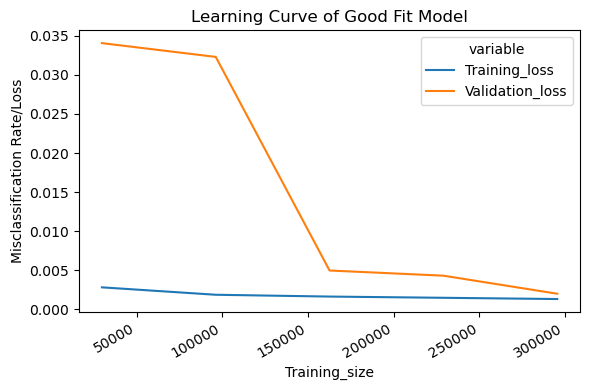

In [58]:
lcHPOrf = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lcHPOrf)

In [56]:
%%time
HPOrf2 = RandomForestClassifier(criterion='gini', max_depth=49, max_features=19, min_samples_leaf=2, 
                               min_samples_split=8, n_estimators=191)
HPOrf2.fit(X_train,y_train)
HPOrf2_test =HPOrf2.predict(X_test)
HPOrf2_train=HPOrf2.predict(X_train)

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf2_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf2_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf2_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf2_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf2_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf2_test, average=None)))

Accuracy of Random Forest: 0.998196711650657
Precision of Random Forest: 0.9981975460660659
Recall of Random Forest: 0.998196711650657
Average F1 of Random Forest: 0.998195791454937
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
          13       1.00      1.00      1.00      7927
     

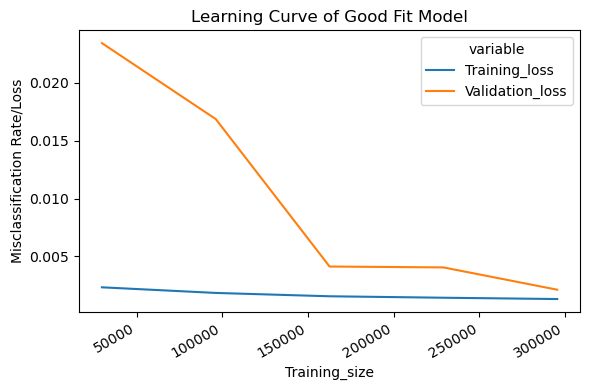

In [57]:
lcHPOrf2 = learn_curve(X_train,y_train,1,HPOrf2) 
print_graph(lcHPOrf2)

In [66]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'depth': int(params['depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
        'random_state': int(params['random_state']), 
        'reg_lambda': int(params['reg_lambda'])

    }
    
    HPOcat = CatBoostClassifier(**params)
    HPOcat.fit(X_train, y_train)
    y_pred = HPOcat.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'depth': hp.quniform('depth', 1, 10, 1),
    'learning_rate': hp.normal('learning_rate', 0.001, 0.8),
    
    'random_state': hp.quniform('random_state', 10, 200, 10),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1)

}

bestcat = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

print("CatBoost: Hyperopt estimated optimum {}".format(bestcat))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]0:	learn: 1.3877819	total: 63.1ms	remaining: 4.04s
1:	learn: 0.9361735	total: 122ms	remaining: 3.84s
2:	learn: 0.5769638	total: 191ms	remaining: 3.94s
3:	learn: 0.4622991	total: 247ms	remaining: 3.77s
4:	learn: 0.4020843	total: 299ms	remaining: 3.59s
5:	learn: 0.3368300	total: 364ms	remaining: 3.58s
6:	learn: 0.2852797	total: 430ms	remaining: 3.56s
7:	learn: 0.2527950	total: 491ms	remaining: 3.5s
8:	learn: 0.2274432	total: 544ms	remaining: 3.38s
9:	learn: 0.2028355	total: 607ms	remaining: 3.34s
10:	learn: 0.1821945	total: 673ms	remaining: 3.31s
11:	learn: 0.1657729	total: 732ms	remaining: 3.23s
12:	learn: 0.1483951	total: 797ms	remaining: 3.19s
13:	learn: 0.1362354	total: 852ms	remaining: 3.1s
14:	learn: 0.1314131	total: 906ms	remaining: 3.02s
15:	learn: 0.1236736	total: 965ms	remaining: 2.95s
16:	learn: 0.1132842	total: 1.04s	remaining: 2.94s
17:	learn: 0.1051916	total: 1.1s	remaining: 2.89s
18:	learn: 0.1005486	total: 1.16s	remain

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 1.2826968	total: 136ms	remaining: 3.26s
1:	learn: 65.3421052	total: 275ms	remaining: 3.16s
2:	learn: 565.6264276	total: 413ms	remaining: 3.03s
3:	learn: 283.8672491	total: 552ms	remaining: 2.9s
4:	learn: 149.1436240	total: 690ms	remaining: 2.76s
5:	learn: 109.0312982	total: 827ms	remaining: 2.62s
6:	learn: 76.3205010	total: 970ms	remaining: 2.5s
7:	learn: 65.9288825	total: 1.11s	remaining: 2.37s
8:	learn: 56.4134047	total: 1.26s	remaining: 2.24s
9:	learn: 48.8248167	total: 1.4s	remaining: 2.11s
10:	learn: 45.4332029	total: 1.55s	remaining: 1.97s
11:	learn: 44.0272346	total: 1.7s	remaining: 1.84s
12:	learn: 41.7575108	total: 1.84s	remaining: 1.7s
13:	learn: 38.9893337	total: 1.99s	remaining: 1.56s
14:	learn: 37.3561329	total: 2.14s	remaining: 1.42s
15:	learn: 35.5078706	total: 2.28s	remaining: 1.28s
16:	learn: 33.8679650	total: 2.43s	remaining: 1.14s
17:	learn: 33.4500333	total: 2.58s	remaining: 1s
18:	learn: 32.4027718	total: 2.72s	remaining: 860ms
19:	learn: 30.0468204	total

46:	learn: 18.0309821	total: 5.61s	remaining: 2.15s
47:	learn: 17.8626170	total: 5.73s	remaining: 2.03s
48:	learn: 17.6610493	total: 5.85s	remaining: 1.91s
49:	learn: 17.5361740	total: 5.98s	remaining: 1.79s
50:	learn: 17.4397627	total: 6.1s	remaining: 1.67s
51:	learn: 17.2649649	total: 6.22s	remaining: 1.55s
52:	learn: 17.2307927	total: 6.34s	remaining: 1.44s
53:	learn: 16.9808345	total: 6.46s	remaining: 1.32s
54:	learn: 16.7992190	total: 6.58s	remaining: 1.2s
55:	learn: 16.6301016	total: 6.7s	remaining: 1.08s
56:	learn: 16.5630833	total: 6.82s	remaining: 958ms
57:	learn: 16.5147620	total: 6.94s	remaining: 838ms
58:	learn: 16.3754917	total: 7.07s	remaining: 719ms
59:	learn: 16.3051256	total: 7.19s	remaining: 599ms
60:	learn: 16.2237006	total: 7.31s	remaining: 479ms
61:	learn: 16.1008388	total: 7.43s	remaining: 360ms
62:	learn: 16.0260794	total: 7.55s	remaining: 240ms
63:	learn: 15.9778891	total: 7.67s	remaining: 120ms
64:	learn: 15.9062553	total: 7.8s	remaining: 0us
 20%|██        | 4

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4610658	total: 76.2ms	remaining: 1.45s
1:	learn: 711.7833572	total: 153ms	remaining: 1.38s
2:	learn: 2384.9792857	total: 232ms	remaining: 1.31s
3:	learn: 1551.9515618	total: 305ms	remaining: 1.22s
4:	learn: 913.7587497	total: 384ms	remaining: 1.15s
5:	learn: 746.1789342	total: 455ms	remaining: 1.06s
6:	learn: 645.4750278	total: 531ms	remaining: 986ms
7:	learn: 527.1177848	total: 615ms	remaining: 922ms
8:	learn: 447.6612171	total: 683ms	remaining: 835ms
9:	learn: 389.9383097	total: 766ms	remaining: 766ms
10:	learn: 336.6684130	total: 828ms	remaining: 677ms
11:	learn: 280.2922940	total: 909ms	remaining: 606ms
12:	learn: 226.1130589	total: 982ms	remaining: 529ms
13:	learn: 160.9221394	total: 1.06s	remaining: 453ms
14:	learn: 116.8250331	total: 1.13s	remaining: 378ms
15:	learn: 93.5675226	total: 1.21s	remaining: 302ms
16:	learn: 87.0056883	total: 1.28s	remaining: 227ms
17:	learn: 84.9876024	total: 1.35s	remaining: 150ms
18:	learn: 78.9479409	total: 1.43s	remaining: 75.5ms
19:	l

15:	learn: 1.3640834	total: 1.17s	remaining: 2.13s
16:	learn: 1.3129224	total: 1.25s	remaining: 2.06s
17:	learn: 1.2763928	total: 1.32s	remaining: 1.99s
18:	learn: 1.2430512	total: 1.4s	remaining: 1.91s
19:	learn: 1.2149466	total: 1.46s	remaining: 1.83s
20:	learn: 1.1895378	total: 1.53s	remaining: 1.75s
21:	learn: 1.1576840	total: 1.61s	remaining: 1.68s
22:	learn: 1.1267085	total: 1.68s	remaining: 1.6s
23:	learn: 1.0992050	total: 1.75s	remaining: 1.53s
24:	learn: 1.0749395	total: 1.82s	remaining: 1.46s
25:	learn: 1.0503050	total: 1.9s	remaining: 1.39s
26:	learn: 1.0197530	total: 1.97s	remaining: 1.31s
27:	learn: 1.0000120	total: 2.04s	remaining: 1.24s
28:	learn: 0.9727500	total: 2.11s	remaining: 1.16s
29:	learn: 0.9509886	total: 2.18s	remaining: 1.09s
30:	learn: 0.9226701	total: 2.25s	remaining: 1.02s
31:	learn: 0.9011375	total: 2.33s	remaining: 945ms
32:	learn: 0.8778350	total: 2.39s	remaining: 870ms
33:	learn: 0.8636514	total: 2.46s	remaining: 796ms
34:	learn: 0.8438666	total: 2.54s	

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 1.6878780	total: 180ms	remaining: 9.72s
1:	learn: 635.4180377	total: 364ms	remaining: 9.64s
2:	learn: 788.1384810	total: 553ms	remaining: 9.58s
3:	learn: 454.9167914	total: 736ms	remaining: 9.38s
4:	learn: 255.5499396	total: 933ms	remaining: 9.32s
5:	learn: 232.3021330	total: 1.12s	remaining: 9.16s
6:	learn: 221.9402282	total: 1.31s	remaining: 9.01s
7:	learn: 211.0138572	total: 1.51s	remaining: 8.86s
8:	learn: 198.6384211	total: 1.7s	remaining: 8.69s
9:	learn: 188.2728916	total: 1.89s	remaining: 8.5s
10:	learn: 183.4142444	total: 2.08s	remaining: 8.34s
11:	learn: 177.7397942	total: 2.28s	remaining: 8.16s
12:	learn: 171.3100070	total: 2.48s	remaining: 8s
13:	learn: 165.5336282	total: 2.67s	remaining: 7.82s
14:	learn: 161.1041113	total: 2.86s	remaining: 7.62s
15:	learn: 157.6346131	total: 3.05s	remaining: 7.44s
16:	learn: 149.8977193	total: 3.25s	remaining: 7.27s
17:	learn: 145.1885904	total: 3.45s	remaining: 7.09s
18:	learn: 138.9506587	total: 3.64s	remaining: 6.91s
19:	learn:

56:	learn: 8.0387378	total: 8.1s	remaining: 1.85s
57:	learn: 7.9523280	total: 8.25s	remaining: 1.71s
58:	learn: 7.8929466	total: 8.39s	remaining: 1.56s
59:	learn: 7.7768919	total: 8.53s	remaining: 1.42s
60:	learn: 7.6828423	total: 8.67s	remaining: 1.28s
61:	learn: 7.6443329	total: 8.82s	remaining: 1.14s
62:	learn: 7.5774242	total: 8.96s	remaining: 996ms
63:	learn: 7.4691183	total: 9.11s	remaining: 854ms
64:	learn: 7.4197006	total: 9.25s	remaining: 712ms
65:	learn: 7.3690208	total: 9.39s	remaining: 569ms
66:	learn: 7.3345039	total: 9.54s	remaining: 427ms
67:	learn: 7.2709993	total: 9.68s	remaining: 285ms
68:	learn: 7.2119782	total: 9.82s	remaining: 142ms
69:	learn: 7.1774775	total: 9.97s	remaining: 0us
 65%|██████▌   | 13/20 [01:35<00:59,  8.48s/trial, best loss: -0.9958276857799516]

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4260792	total: 76.4ms	remaining: 7.56s
1:	learn: 464.1656806	total: 154ms	remaining: 7.54s
2:	learn: 1179.6014106	total: 235ms	remaining: 7.6s
3:	learn: 1046.7656433	total: 311ms	remaining: 7.46s
4:	learn: 657.1536339	total: 389ms	remaining: 7.38s
5:	learn: 540.4070106	total: 459ms	remaining: 7.19s
6:	learn: 512.4290471	total: 537ms	remaining: 7.14s
7:	learn: 375.7239651	total: 617ms	remaining: 7.1s
8:	learn: 397.9648280	total: 684ms	remaining: 6.91s
9:	learn: 302.8442036	total: 764ms	remaining: 6.88s
10:	learn: 232.2904833	total: 844ms	remaining: 6.83s
11:	learn: 167.3647958	total: 921ms	remaining: 6.75s
12:	learn: 121.9364422	total: 1s	remaining: 6.71s
13:	learn: 105.2993273	total: 1.08s	remaining: 6.63s
14:	learn: 81.4864096	total: 1.16s	remaining: 6.57s
15:	learn: 72.4744632	total: 1.24s	remaining: 6.51s
16:	learn: 68.3315199	total: 1.31s	remaining: 6.4s
17:	learn: 67.7661468	total: 1.39s	remaining: 6.34s
18:	learn: 65.2880701	total: 1.46s	remaining: 6.23s
19:	learn: 60

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.8321913	total: 255ms	remaining: 3.57s
1:	learn: 59.2757224	total: 518ms	remaining: 3.36s
2:	learn: 249.3650473	total: 778ms	remaining: 3.11s
3:	learn: 156.3166203	total: 1.04s	remaining: 2.86s
4:	learn: 72.3699483	total: 1.31s	remaining: 2.61s
5:	learn: 63.1268847	total: 1.56s	remaining: 2.34s
6:	learn: 55.5411878	total: 1.82s	remaining: 2.09s
7:	learn: 48.8069769	total: 2.09s	remaining: 1.83s
8:	learn: 42.9166783	total: 2.36s	remaining: 1.57s
9:	learn: 42.4264237	total: 2.62s	remaining: 1.31s
10:	learn: 39.3901711	total: 2.9s	remaining: 1.05s
11:	learn: 39.5291817	total: 3.16s	remaining: 791ms
12:	learn: 34.5590219	total: 3.43s	remaining: 528ms
13:	learn: 33.1334461	total: 3.7s	remaining: 264ms
14:	learn: 30.7680828	total: 3.97s	remaining: 0us
 75%|███████▌  | 15/20 [01:51<00:39,  7.89s/trial, best loss: -0.9958276857799516]0:	learn: 0.3939928	total: 251ms	remaining: 3.51s
1:	learn: 0.2451035	total: 513ms	remaining: 3.34s
2:	learn: 0.1650544	total: 774ms	remaining: 3.1s
3:

42:	learn: 38.8217732	total: 3.14s	remaining: 2.33s
43:	learn: 37.9822427	total: 3.21s	remaining: 2.26s
44:	learn: 37.7115373	total: 3.28s	remaining: 2.19s
45:	learn: 37.1874118	total: 3.36s	remaining: 2.12s
46:	learn: 36.6918091	total: 3.43s	remaining: 2.04s
47:	learn: 36.0604293	total: 3.51s	remaining: 1.97s
48:	learn: 35.3759699	total: 3.58s	remaining: 1.9s
49:	learn: 34.6993174	total: 3.66s	remaining: 1.83s
50:	learn: 34.5682703	total: 3.73s	remaining: 1.75s
51:	learn: 34.0770031	total: 3.81s	remaining: 1.68s
52:	learn: 33.5618111	total: 3.88s	remaining: 1.61s
53:	learn: 33.2988307	total: 3.96s	remaining: 1.54s
54:	learn: 32.7406950	total: 4.03s	remaining: 1.47s
55:	learn: 32.3923996	total: 4.1s	remaining: 1.39s
56:	learn: 31.9464541	total: 4.17s	remaining: 1.32s
57:	learn: 31.4913554	total: 4.25s	remaining: 1.24s
58:	learn: 31.3225697	total: 4.32s	remaining: 1.17s
59:	learn: 30.8299604	total: 4.4s	remaining: 1.1s
60:	learn: 30.5743508	total: 4.47s	remaining: 1.02s
61:	learn: 30.14

In [73]:
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.47894150811308084, n_estimators =55, depth = 8, 
                            random_state=130, reg_lambda = 4, n_estimators =80, bootstrap_type= 'Bernoulli', 
                            random_strength= 1,
                            min_data_in_leaf= 10, l2_leaf_reg= 3, loss_function= 'MultiClassOneVsAll', 
                            grow_policy= 'Depthwise', max_bin= 1024, model_size_reg= 0,
                            task_type= 'GPU', od_type= 'IncToDec', od_wait= 100, metric_period= 500, verbose= 500, 
                            subsample= 0.8,od_pval= 1e-10, max_ctr_complexity= 8, has_time= False, simple_ctr= 'FeatureFreq', 
                            combinations_ctr= 'FeatureFreq', random_seed=13).fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.3437724	total: 16.2ms	remaining: 875ms
54:	learn: 0.0012137	total: 637ms	remaining: 0us
0:	learn: 0.3437724	total: 15ms	remaining: 811ms
54:	learn: 0.0011789	total: 634ms	remaining: 0us
Accuracy of LightGBM + Hyperparameter: 0.9978902704932524
Precision of LightGBM + Hyperparameter: 0.9978919545461933
Recall of LightGBM + Hyperparameter: 0.9978902704932524
Average F1 of LightGBM + Hyperparameter: 0.9978898222272381
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00   

0:	learn: 0.3438871	total: 15ms	remaining: 811ms
54:	learn: 0.0012658	total: 582ms	remaining: 0us
0:	learn: 0.3439739	total: 13ms	remaining: 700ms
54:	learn: 0.0012227	total: 541ms	remaining: 0us
0:	learn: 0.3439447	total: 13.5ms	remaining: 731ms
54:	learn: 0.0012361	total: 560ms	remaining: 0us
0:	learn: 0.3428014	total: 13.7ms	remaining: 741ms
54:	learn: 0.0012162	total: 573ms	remaining: 0us
0:	learn: 0.3439135	total: 13.3ms	remaining: 719ms
54:	learn: 0.0012462	total: 556ms	remaining: 0us
0:	learn: 0.3437711	total: 14.8ms	remaining: 801ms
54:	learn: 0.0011608	total: 615ms	remaining: 0us
0:	learn: 0.3384821	total: 7.41ms	remaining: 400ms
54:	learn: 0.0025807	total: 322ms	remaining: 0us
0:	learn: 0.3342663	total: 9.02ms	remaining: 487ms
54:	learn: 0.0019459	total: 330ms	remaining: 0us
0:	learn: 0.3334190	total: 11ms	remaining: 592ms
54:	learn: 0.0016551	total: 414ms	remaining: 0us
0:	learn: 0.3330829	total: 12.2ms	remaining: 657ms
54:	learn: 0.0015272	total: 448ms	remaining: 0us
0:	lea

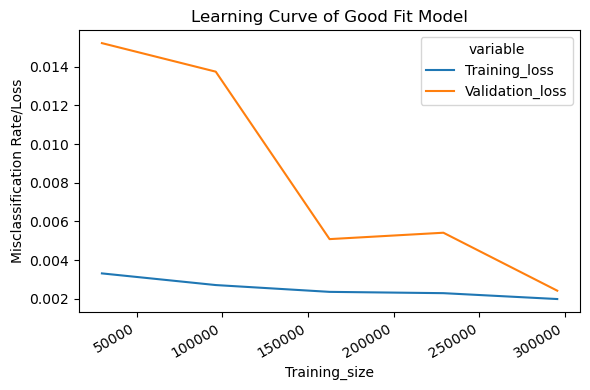

In [74]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)

In [76]:
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.47894150811308084, depth = 8, 
                            random_state=130, n_estimators =80, bootstrap_type= 'Bernoulli', 
                            random_strength= 1,
                            min_data_in_leaf= 10, l2_leaf_reg=4 , loss_function= 'MultiClassOneVsAll', 
                            grow_policy= 'Depthwise', max_bin= 1024, model_size_reg= 0,
                            task_type= 'GPU', od_type= 'IncToDec', od_wait= 100, metric_period= 500, verbose= 500, 
                            subsample= 0.8,od_pval= 1e-10, max_ctr_complexity= 8, has_time= False, simple_ctr= 'FeatureFreq', 
                            combinations_ctr= 'FeatureFreq').fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.3436482	total: 16.6ms	remaining: 1.31s
79:	learn: 0.0009397	total: 849ms	remaining: 0us
0:	learn: 0.3436483	total: 14.9ms	remaining: 1.18s
79:	learn: 0.0009364	total: 827ms	remaining: 0us
Accuracy of LightGBM + Hyperparameter: 0.9981259944604868
Precision of LightGBM + Hyperparameter: 0.9981265090500242
Recall of LightGBM + Hyperparameter: 0.9981259944604868
Average F1 of LightGBM + Hyperparameter: 0.9981246633619246
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00 

0:	learn: 0.3436937	total: 15.2ms	remaining: 1.2s
79:	learn: 0.0009734	total: 819ms	remaining: 0us
0:	learn: 0.3438127	total: 13.9ms	remaining: 1.1s
79:	learn: 0.0009900	total: 787ms	remaining: 0us
0:	learn: 0.3437373	total: 16.4ms	remaining: 1.29s
79:	learn: 0.0009857	total: 800ms	remaining: 0us
0:	learn: 0.3437993	total: 13.6ms	remaining: 1.07s
79:	learn: 0.0009508	total: 787ms	remaining: 0us
0:	learn: 0.3437088	total: 13.1ms	remaining: 1.04s
79:	learn: 0.0009900	total: 740ms	remaining: 0us
0:	learn: 0.3436465	total: 14.9ms	remaining: 1.18s
79:	learn: 0.0009379	total: 833ms	remaining: 0us
0:	learn: 0.3362798	total: 7.4ms	remaining: 584ms
79:	learn: 0.0016567	total: 411ms	remaining: 0us
0:	learn: 0.3336231	total: 9.32ms	remaining: 737ms
79:	learn: 0.0013018	total: 517ms	remaining: 0us
0:	learn: 0.3330344	total: 10.8ms	remaining: 851ms
79:	learn: 0.0012972	total: 574ms	remaining: 0us
0:	learn: 0.3328571	total: 12.3ms	remaining: 975ms
79:	learn: 0.0011375	total: 631ms	remaining: 0us
0:	

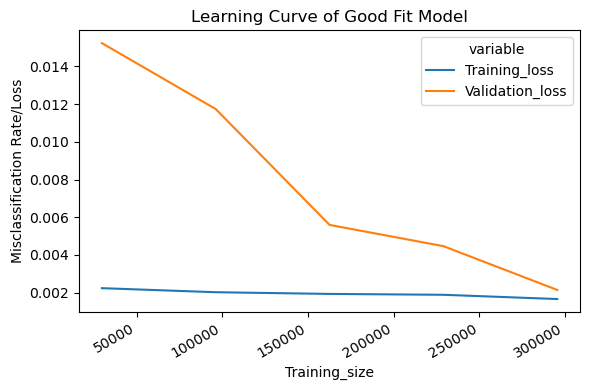

In [77]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)

In [84]:
#### tooken
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.47894150811308084, depth = 8, 
                            random_state=130, n_estimators =80, bootstrap_type= 'Bernoulli', 
                            random_strength= 1,
                            min_data_in_leaf= 10, l2_leaf_reg=4 , loss_function= 'MultiClassOneVsAll', 
                            grow_policy= 'Depthwise', max_bin= 1024, model_size_reg= 0,
                            task_type= 'GPU', od_type= 'IncToDec', od_wait= 100, metric_period= 500, verbose= 500, 
                            subsample= 0.8,od_pval= 1e-10, max_ctr_complexity= 8, has_time= False, simple_ctr= 'FeatureFreq', 
                            combinations_ctr= 'FeatureFreq').fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.3437724	total: 16.8ms	remaining: 1.32s
79:	learn: 0.0010370	total: 900ms	remaining: 0us
0:	learn: 0.3437725	total: 14.8ms	remaining: 1.17s
79:	learn: 0.0010311	total: 873ms	remaining: 0us
Accuracy of LightGBM + Hyperparameter: 0.9980199186752313
Precision of LightGBM + Hyperparameter: 0.9980200588295707
Recall of LightGBM + Hyperparameter: 0.9980199186752313
Average F1 of LightGBM + Hyperparameter: 0.9980184383756302
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00 

0:	learn: 0.3438870	total: 14.7ms	remaining: 1.16s
79:	learn: 0.0010807	total: 778ms	remaining: 0us
0:	learn: 0.3439741	total: 13.8ms	remaining: 1.09s
79:	learn: 0.0011223	total: 751ms	remaining: 0us
0:	learn: 0.3439447	total: 13.6ms	remaining: 1.07s
79:	learn: 0.0010946	total: 775ms	remaining: 0us
0:	learn: 0.3428016	total: 13.6ms	remaining: 1.07s
79:	learn: 0.0010358	total: 793ms	remaining: 0us
0:	learn: 0.3439134	total: 14.3ms	remaining: 1.13s
79:	learn: 0.0010825	total: 750ms	remaining: 0us
0:	learn: 0.3437711	total: 14.8ms	remaining: 1.17s
79:	learn: 0.0010050	total: 844ms	remaining: 0us
0:	learn: 0.3384821	total: 7.55ms	remaining: 597ms
79:	learn: 0.0020009	total: 455ms	remaining: 0us
0:	learn: 0.3342665	total: 9ms	remaining: 711ms
79:	learn: 0.0015254	total: 458ms	remaining: 0us
0:	learn: 0.3334189	total: 11.1ms	remaining: 875ms
79:	learn: 0.0013651	total: 576ms	remaining: 0us
0:	learn: 0.3330826	total: 11.9ms	remaining: 938ms
79:	learn: 0.0013373	total: 616ms	remaining: 0us
0:	

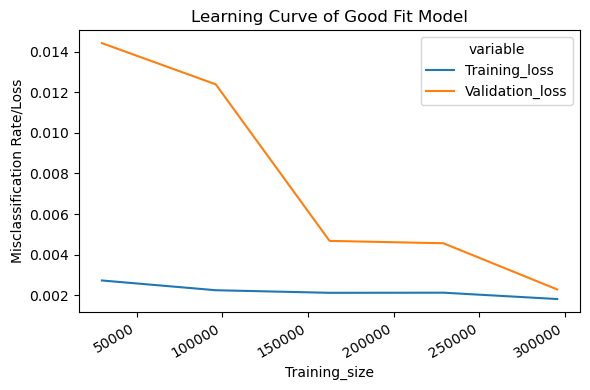

In [87]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)

In [88]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(params):
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
        'random_state': int(params['random_state']), 
        'reg_alpha': int(params['reg_alpha']),
        'reg_lambda': int(params['reg_lambda']),

        'min_child_weight': abs(float(params['min_child_weight'])),
    }
    
    HPOxgb = xgb.XGBClassifier( **params)
    HPOxgb.fit(X_train, y_train)
    y_pred = HPOxgb.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
    
    'random_state': hp.quniform('random_state', 10, 200, 10),
    'reg_alpha': hp.quniform('reg_alpha', 1, 10, 1),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1),

    'min_child_weight': hp.normal('min_child_weight', 0.01, 0.9),
}

bestxg = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(bestxg))

100%|██████████| 20/20 [1:12:35<00:00, 217.76s/trial, best loss: -0.9984088632211681]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.3199427355278901, 'max_depth': 28.0, 'min_child_weight': 0.17335517433506883, 'n_estimators': 85.0, 'random_state': 120.0, 'reg_alpha': 2.0, 'reg_lambda': 9.0}


In [89]:
%%time
HPOxgb = xgb.XGBClassifier(learning_rate=  0.3199427355278901, 
                           n_estimators = 85, max_depth = 28, random_state=120, min_child_weight= 0.17335517433506883, 
                           reg_alpha= 2, reg_lambda = 9).fit(X_train, y_train)
HPOxgb_train = HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test, HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

Accuracy of XGBoost: 0.9984088632211681
Precision of XGBoost: 0.9984098415647817
Recall of XGBoost: 0.9984088632211681
Average F1 of XGBoost: 0.998408290612376
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
          13       1.00      1.00      1.00      7927
          14       1.00    

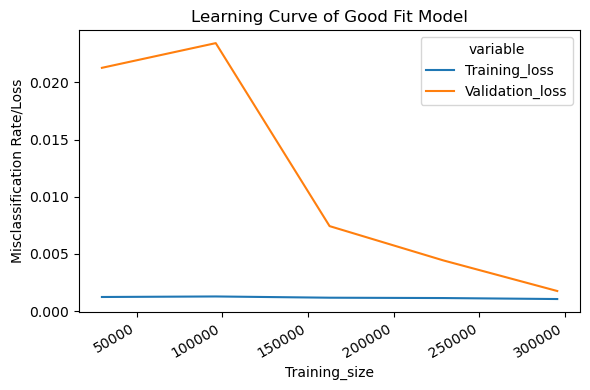

In [90]:
lcHPOxgb = learn_curve(X_train,y_train,1,HPOxgb) 
print_graph(lcHPOxgb)

In [91]:
df

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Flow Pkts/s,Bwd URG Flags,Fwd Pkts/s,Pkt Len Min,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Label
0,0.001366,0.030571,0.006260,0.000000,5.112433e-04,0.0,2.556196e-04,0.030571,0.0,0.004545,0.045516,0.006260,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,0.003127,0.000000,0.007957,0.008673,4.301768e-05,0.0,2.389691e-05,0.000000,0.0,0.000000,0.022947,0.007957,0.0,0.0,0.0,0.0,0.0,0.0,0.125015,0
2,0.020555,0.000000,0.019963,0.037698,2.252297e-06,0.0,1.199331e-06,0.000000,1.0,0.000000,0.082397,0.019963,0.0,0.0,0.0,0.0,0.0,0.0,0.125015,0
3,0.013086,0.000000,0.006079,0.022488,7.998705e-08,0.0,3.595639e-08,0.000000,1.0,0.004545,0.047597,0.006079,0.0,0.0,0.0,0.0,0.0,0.0,0.125015,0
4,0.009655,0.000000,0.007971,0.017887,8.207342e-07,0.0,4.811204e-07,0.000000,0.0,0.000000,0.095855,0.007971,0.0,0.0,0.0,0.0,0.0,0.0,0.445572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424220,0.009898,0.000000,0.005669,0.019046,2.781297e-07,0.0,1.696058e-07,0.000000,0.0,0.000000,0.416597,0.005669,0.0,0.0,0.0,0.0,0.0,0.0,0.445572,7
424221,0.014300,0.000000,0.013105,0.034808,2.129603e-07,0.0,1.044470e-07,0.000000,0.0,0.004545,0.180978,0.013105,0.0,0.0,0.0,0.0,0.0,0.0,0.445572,7
424222,0.009534,0.000000,0.006240,0.019612,2.782034e-07,0.0,1.479294e-07,0.000000,0.0,0.000000,0.416179,0.006240,0.0,0.0,0.0,0.0,0.0,0.0,0.445572,7
424223,0.011204,0.000000,0.006417,0.021559,2.782060e-07,0.0,1.696527e-07,0.000000,0.0,0.000000,0.418095,0.006417,0.0,0.0,0.0,0.0,0.0,0.0,0.445572,7


In [49]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'random_state': int(params['random_state']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    
    HPOrf = RandomForestClassifier( **params)
    HPOrf.fit(X_train,y_train)
    y_pred = HPOrf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'random_state': hp.quniform('random_state', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 29, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

bestHPOrf = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(bestHPOrf))

100%|██████████| 20/20 [37:49<00:00, 113.47s/trial, best loss: -0.9984560080146149]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 36.0, 'max_features': 19.0, 'min_samples_leaf': 4.0, 'min_samples_split': 8.0, 'n_estimators': 101.0, 'random_state': 136.0}


In [50]:
%%time
HPOrf = RandomForestClassifier(criterion='entropy', max_depth=36, max_features=19, min_samples_leaf=3, 
                               min_samples_split=7, n_estimators=27, random_state= 106).fit(X_train, y_train)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

Accuracy of Random Forest: 0.9985502976015086
Precision of Random Forest: 0.99855156074082
Recall of Random Forest: 0.9985502976015086
Average F1 of Random Forest: 0.9985495971380148
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
          13       1.00      1.00      1.00      7927
    

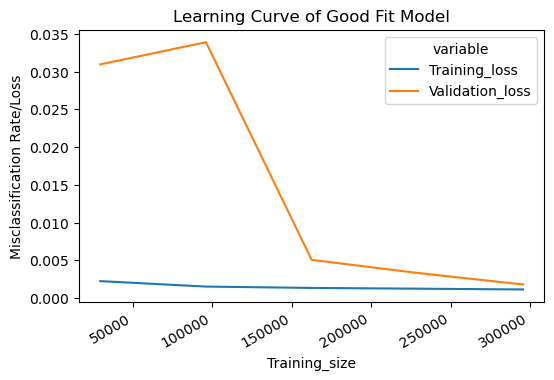

In [51]:
lcHPOrf = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lcHPOrf)

In [52]:
%%time
HPOrf2 = RandomForestClassifier(criterion='gini', max_depth=49, max_features=19, min_samples_leaf=2, 
                               min_samples_split=8, n_estimators=191)
HPOrf2.fit(X_train,y_train)
HPOrf2_test =HPOrf2.predict(X_test)
HPOrf2_train=HPOrf2.predict(X_train)

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf2_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf2_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf2_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf2_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf2_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf2_test, average=None)))

Accuracy of Random Forest: 0.9984913666097001
Precision of Random Forest: 0.9984929028278663
Recall of Random Forest: 0.9984913666097001
Average F1 of Random Forest: 0.9984908109670086
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
          13       1.00      1.00      1.00      7927
  

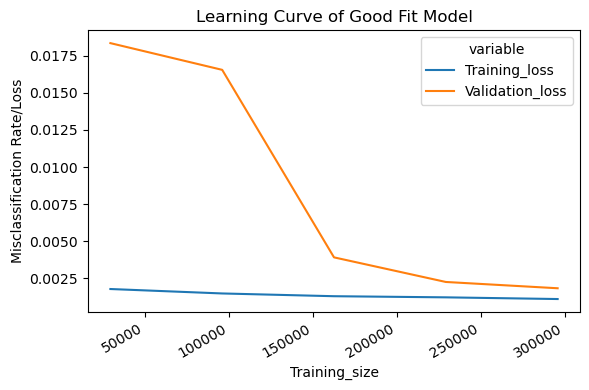

In [53]:
lcHPOrf2 = learn_curve(X_train,y_train,1,HPOrf2) 
print_graph(lcHPOrf2)

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'learning_rate':  abs(float(params['learning_rate'])),

        'random_state': int(params['random_state']), 
        'reg_lambda': int(params['reg_lambda'])

    }
    
    HPOcat = CatBoostClassifier(**params)
    HPOcat.fit(X_train, y_train)
    y_pred = HPOcat.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

    space = {
        'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
        'learning_rate': hp.normal('learning_rate', 0.1, 0.9),

        'random_state': hp.quniform('random_state', 10, 200, 10),
        'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1)

    }

bestcat = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

print("CatBoost: Hyperopt estimated optimum {}".format(bestcat))

In [54]:
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.24393503372262373, n_estimators =80, max_depth = 7, 
                              random_state=140, reg_lambda = 6).fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.7961329	total: 229ms	remaining: 18.1s
1:	learn: 0.5194730	total: 388ms	remaining: 15.1s
2:	learn: 0.4028696	total: 547ms	remaining: 14s
3:	learn: 0.3268186	total: 706ms	remaining: 13.4s
4:	learn: 0.2751964	total: 859ms	remaining: 12.9s
5:	learn: 0.2266974	total: 1.01s	remaining: 12.5s
6:	learn: 0.1944103	total: 1.16s	remaining: 12.1s
7:	learn: 0.1733697	total: 1.32s	remaining: 11.9s
8:	learn: 0.1505789	total: 1.48s	remaining: 11.7s
9:	learn: 0.1334206	total: 1.63s	remaining: 11.4s
10:	learn: 0.1160300	total: 1.79s	remaining: 11.2s
11:	learn: 0.1084085	total: 1.94s	remaining: 11s
12:	learn: 0.0980509	total: 2.1s	remaining: 10.8s
13:	learn: 0.0886944	total: 2.25s	remaining: 10.6s
14:	learn: 0.0839470	total: 2.41s	remaining: 10.4s
15:	learn: 0.0755501	total: 2.57s	remaining: 10.3s
16:	learn: 0.0698006	total: 2.72s	remaining: 10.1s
17:	learn: 0.0651762	total: 2.88s	remaining: 9.92s
18:	learn: 0.0621822	total: 3.04s	remaining: 9.77s
19:	learn: 0.0590006	total: 3.2s	remaining: 9.

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3096
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       0.99      1.00      0.99      5538
           4       0.99      1.00      0.99      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1919
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       0.67      1.00      0.80         2
          12       1.00      0.99      1.00      3903
          13       1.00      0.99      0.99      7927
          14       1.00      1.00      1.00     15385
          15       1.00      1.00      1.00      8273
          16       1.00      1.00      1.00      7214

    accuracy              

0:	learn: 0.8056771	total: 129ms	remaining: 10.2s
1:	learn: 0.5332832	total: 254ms	remaining: 9.91s
2:	learn: 0.4155502	total: 381ms	remaining: 9.77s
3:	learn: 0.3362468	total: 507ms	remaining: 9.63s
4:	learn: 0.2748103	total: 634ms	remaining: 9.51s
5:	learn: 0.2264210	total: 758ms	remaining: 9.35s
6:	learn: 0.1961951	total: 887ms	remaining: 9.25s
7:	learn: 0.1725380	total: 1.01s	remaining: 9.11s
8:	learn: 0.1531184	total: 1.14s	remaining: 8.99s
9:	learn: 0.1337195	total: 1.27s	remaining: 8.88s
10:	learn: 0.1249758	total: 1.4s	remaining: 8.77s
11:	learn: 0.1112856	total: 1.53s	remaining: 8.65s
12:	learn: 0.0982035	total: 1.65s	remaining: 8.52s
13:	learn: 0.0913163	total: 1.78s	remaining: 8.41s
14:	learn: 0.0841703	total: 1.91s	remaining: 8.29s
15:	learn: 0.0785665	total: 2.04s	remaining: 8.18s
16:	learn: 0.0745923	total: 2.17s	remaining: 8.06s
17:	learn: 0.0689708	total: 2.3s	remaining: 7.93s
18:	learn: 0.0645177	total: 2.43s	remaining: 7.79s
19:	learn: 0.0618438	total: 2.56s	remaining

2:	learn: 0.4139684	total: 382ms	remaining: 9.81s
3:	learn: 0.3358925	total: 512ms	remaining: 9.73s
4:	learn: 0.2778224	total: 638ms	remaining: 9.57s
5:	learn: 0.2246162	total: 765ms	remaining: 9.44s
6:	learn: 0.1896183	total: 893ms	remaining: 9.32s
7:	learn: 0.1622268	total: 1.02s	remaining: 9.16s
8:	learn: 0.1485275	total: 1.15s	remaining: 9.06s
9:	learn: 0.1291383	total: 1.27s	remaining: 8.91s
10:	learn: 0.1205479	total: 1.41s	remaining: 8.82s
11:	learn: 0.1059544	total: 1.53s	remaining: 8.69s
12:	learn: 0.0976035	total: 1.66s	remaining: 8.56s
13:	learn: 0.0907591	total: 1.8s	remaining: 8.48s
14:	learn: 0.0822158	total: 1.93s	remaining: 8.35s
15:	learn: 0.0772204	total: 2.06s	remaining: 8.23s
16:	learn: 0.0729866	total: 2.19s	remaining: 8.1s
17:	learn: 0.0688195	total: 2.31s	remaining: 7.97s
18:	learn: 0.0658361	total: 2.44s	remaining: 7.85s
19:	learn: 0.0622066	total: 2.57s	remaining: 7.71s
20:	learn: 0.0586468	total: 2.7s	remaining: 7.59s
21:	learn: 0.0563964	total: 2.83s	remainin

4:	learn: 0.2695213	total: 667ms	remaining: 10s
5:	learn: 0.2259039	total: 792ms	remaining: 9.77s
6:	learn: 0.1893525	total: 924ms	remaining: 9.63s
7:	learn: 0.1660543	total: 1.05s	remaining: 9.48s
8:	learn: 0.1441316	total: 1.18s	remaining: 9.34s
9:	learn: 0.1278395	total: 1.32s	remaining: 9.22s
10:	learn: 0.1164837	total: 1.45s	remaining: 9.09s
11:	learn: 0.1033122	total: 1.59s	remaining: 8.99s
12:	learn: 0.0975630	total: 1.72s	remaining: 8.89s
13:	learn: 0.0900763	total: 1.86s	remaining: 8.76s
14:	learn: 0.0845747	total: 1.99s	remaining: 8.63s
15:	learn: 0.0802705	total: 2.13s	remaining: 8.5s
16:	learn: 0.0731634	total: 2.26s	remaining: 8.38s
17:	learn: 0.0678142	total: 2.4s	remaining: 8.25s
18:	learn: 0.0643441	total: 2.53s	remaining: 8.12s
19:	learn: 0.0601732	total: 2.66s	remaining: 7.99s
20:	learn: 0.0571417	total: 2.8s	remaining: 7.87s
21:	learn: 0.0533193	total: 2.93s	remaining: 7.74s
22:	learn: 0.0507828	total: 3.06s	remaining: 7.59s
23:	learn: 0.0482475	total: 3.2s	remaining

9:	learn: 0.1965363	total: 222ms	remaining: 1.55s
10:	learn: 0.1816348	total: 245ms	remaining: 1.53s
11:	learn: 0.1669939	total: 267ms	remaining: 1.51s
12:	learn: 0.1481293	total: 289ms	remaining: 1.49s
13:	learn: 0.1364337	total: 312ms	remaining: 1.47s
14:	learn: 0.1280974	total: 335ms	remaining: 1.45s
15:	learn: 0.1210111	total: 357ms	remaining: 1.43s
16:	learn: 0.1135217	total: 380ms	remaining: 1.41s
17:	learn: 0.1102226	total: 403ms	remaining: 1.39s
18:	learn: 0.1013079	total: 425ms	remaining: 1.36s
19:	learn: 0.0972825	total: 446ms	remaining: 1.34s
20:	learn: 0.0924820	total: 469ms	remaining: 1.32s
21:	learn: 0.0889797	total: 491ms	remaining: 1.29s
22:	learn: 0.0864586	total: 513ms	remaining: 1.27s
23:	learn: 0.0824101	total: 535ms	remaining: 1.25s
24:	learn: 0.0805496	total: 558ms	remaining: 1.23s
25:	learn: 0.0800969	total: 573ms	remaining: 1.19s
26:	learn: 0.0765914	total: 596ms	remaining: 1.17s
27:	learn: 0.0751799	total: 619ms	remaining: 1.15s
28:	learn: 0.0726704	total: 641m

12:	learn: 0.1098036	total: 989ms	remaining: 5.09s
13:	learn: 0.1034735	total: 1.07s	remaining: 5.03s
14:	learn: 0.0920854	total: 1.14s	remaining: 4.96s
15:	learn: 0.0860710	total: 1.23s	remaining: 4.9s
16:	learn: 0.0803538	total: 1.3s	remaining: 4.82s
17:	learn: 0.0778772	total: 1.38s	remaining: 4.77s
18:	learn: 0.0740387	total: 1.46s	remaining: 4.69s
19:	learn: 0.0701417	total: 1.53s	remaining: 4.6s
20:	learn: 0.0679565	total: 1.61s	remaining: 4.52s
21:	learn: 0.0652000	total: 1.69s	remaining: 4.45s
22:	learn: 0.0628320	total: 1.76s	remaining: 4.37s
23:	learn: 0.0604917	total: 1.84s	remaining: 4.3s
24:	learn: 0.0585893	total: 1.92s	remaining: 4.22s
25:	learn: 0.0569489	total: 1.99s	remaining: 4.14s
26:	learn: 0.0550080	total: 2.07s	remaining: 4.07s
27:	learn: 0.0538829	total: 2.15s	remaining: 3.99s
28:	learn: 0.0523426	total: 2.23s	remaining: 3.92s
29:	learn: 0.0505488	total: 2.31s	remaining: 3.85s
30:	learn: 0.0488738	total: 2.39s	remaining: 3.77s
31:	learn: 0.0476715	total: 2.46s	r

14:	learn: 0.0841703	total: 1.93s	remaining: 8.38s
15:	learn: 0.0785665	total: 2.07s	remaining: 8.27s
16:	learn: 0.0745923	total: 2.2s	remaining: 8.14s
17:	learn: 0.0689708	total: 2.33s	remaining: 8.02s
18:	learn: 0.0645177	total: 2.46s	remaining: 7.9s
19:	learn: 0.0618438	total: 2.59s	remaining: 7.77s
20:	learn: 0.0591431	total: 2.72s	remaining: 7.64s
21:	learn: 0.0556015	total: 2.85s	remaining: 7.5s
22:	learn: 0.0523564	total: 2.98s	remaining: 7.37s
23:	learn: 0.0507863	total: 3.1s	remaining: 7.24s
24:	learn: 0.0485245	total: 3.23s	remaining: 7.11s
25:	learn: 0.0464450	total: 3.36s	remaining: 6.97s
26:	learn: 0.0455359	total: 3.49s	remaining: 6.85s
27:	learn: 0.0440991	total: 3.62s	remaining: 6.72s
28:	learn: 0.0427331	total: 3.74s	remaining: 6.58s
29:	learn: 0.0410963	total: 3.87s	remaining: 6.46s
30:	learn: 0.0396966	total: 4s	remaining: 6.32s
31:	learn: 0.0380652	total: 4.13s	remaining: 6.19s
32:	learn: 0.0375789	total: 4.26s	remaining: 6.07s
33:	learn: 0.0368038	total: 4.39s	rema

20:	learn: 0.0785409	total: 1.01s	remaining: 2.85s
21:	learn: 0.0762235	total: 1.06s	remaining: 2.81s
22:	learn: 0.0716459	total: 1.11s	remaining: 2.75s
23:	learn: 0.0701898	total: 1.16s	remaining: 2.71s
24:	learn: 0.0657379	total: 1.21s	remaining: 2.66s
25:	learn: 0.0644734	total: 1.26s	remaining: 2.61s
26:	learn: 0.0593965	total: 1.3s	remaining: 2.56s
27:	learn: 0.0585022	total: 1.35s	remaining: 2.51s
28:	learn: 0.0558437	total: 1.4s	remaining: 2.46s
29:	learn: 0.0541545	total: 1.45s	remaining: 2.41s
30:	learn: 0.0516570	total: 1.49s	remaining: 2.36s
31:	learn: 0.0501394	total: 1.54s	remaining: 2.31s
32:	learn: 0.0479933	total: 1.59s	remaining: 2.26s
33:	learn: 0.0469382	total: 1.64s	remaining: 2.22s
34:	learn: 0.0458569	total: 1.69s	remaining: 2.17s
35:	learn: 0.0449495	total: 1.73s	remaining: 2.12s
36:	learn: 0.0440846	total: 1.78s	remaining: 2.07s
37:	learn: 0.0436334	total: 1.83s	remaining: 2.02s
38:	learn: 0.0424496	total: 1.88s	remaining: 1.97s
39:	learn: 0.0422898	total: 1.93s

22:	learn: 0.0616388	total: 2.35s	remaining: 5.82s
23:	learn: 0.0588463	total: 2.45s	remaining: 5.71s
24:	learn: 0.0558022	total: 2.56s	remaining: 5.62s
25:	learn: 0.0536901	total: 2.66s	remaining: 5.52s
26:	learn: 0.0509537	total: 2.76s	remaining: 5.42s
27:	learn: 0.0493344	total: 2.86s	remaining: 5.32s
28:	learn: 0.0481674	total: 2.97s	remaining: 5.22s
29:	learn: 0.0471649	total: 3.08s	remaining: 5.13s
30:	learn: 0.0450202	total: 3.18s	remaining: 5.02s
31:	learn: 0.0435298	total: 3.28s	remaining: 4.92s
32:	learn: 0.0426165	total: 3.38s	remaining: 4.82s
33:	learn: 0.0415323	total: 3.49s	remaining: 4.72s
34:	learn: 0.0401755	total: 3.59s	remaining: 4.62s
35:	learn: 0.0390922	total: 3.7s	remaining: 4.52s
36:	learn: 0.0384683	total: 3.8s	remaining: 4.42s
37:	learn: 0.0378301	total: 3.9s	remaining: 4.32s
38:	learn: 0.0367531	total: 4.01s	remaining: 4.21s
39:	learn: 0.0363639	total: 4.11s	remaining: 4.11s
40:	learn: 0.0357518	total: 4.21s	remaining: 4.01s
41:	learn: 0.0343745	total: 4.31s	

27:	learn: 0.0740457	total: 626ms	remaining: 1.16s
28:	learn: 0.0725735	total: 649ms	remaining: 1.14s
29:	learn: 0.0694409	total: 671ms	remaining: 1.12s
30:	learn: 0.0679076	total: 694ms	remaining: 1.1s
31:	learn: 0.0664870	total: 716ms	remaining: 1.07s
32:	learn: 0.0662995	total: 738ms	remaining: 1.05s
33:	learn: 0.0649633	total: 760ms	remaining: 1.03s
34:	learn: 0.0649261	total: 769ms	remaining: 989ms
35:	learn: 0.0636477	total: 791ms	remaining: 967ms
36:	learn: 0.0628271	total: 813ms	remaining: 945ms
37:	learn: 0.0627008	total: 829ms	remaining: 916ms
38:	learn: 0.0621709	total: 851ms	remaining: 895ms
39:	learn: 0.0618618	total: 873ms	remaining: 873ms
40:	learn: 0.0616351	total: 896ms	remaining: 852ms
41:	learn: 0.0614522	total: 918ms	remaining: 831ms
42:	learn: 0.0614156	total: 926ms	remaining: 797ms
43:	learn: 0.0599247	total: 948ms	remaining: 776ms
44:	learn: 0.0593313	total: 971ms	remaining: 755ms
45:	learn: 0.0592774	total: 987ms	remaining: 730ms
46:	learn: 0.0583785	total: 1.01

30:	learn: 0.0489342	total: 2.36s	remaining: 3.73s
31:	learn: 0.0471466	total: 2.43s	remaining: 3.65s
32:	learn: 0.0450366	total: 2.51s	remaining: 3.57s
33:	learn: 0.0436174	total: 2.58s	remaining: 3.5s
34:	learn: 0.0423824	total: 2.66s	remaining: 3.42s
35:	learn: 0.0410769	total: 2.74s	remaining: 3.34s
36:	learn: 0.0401529	total: 2.82s	remaining: 3.27s
37:	learn: 0.0393465	total: 2.9s	remaining: 3.2s
38:	learn: 0.0390234	total: 2.97s	remaining: 3.13s
39:	learn: 0.0385440	total: 3.06s	remaining: 3.06s
40:	learn: 0.0377052	total: 3.13s	remaining: 2.98s
41:	learn: 0.0372291	total: 3.21s	remaining: 2.9s
42:	learn: 0.0365068	total: 3.29s	remaining: 2.83s
43:	learn: 0.0360361	total: 3.36s	remaining: 2.75s
44:	learn: 0.0349712	total: 3.44s	remaining: 2.67s
45:	learn: 0.0347504	total: 3.51s	remaining: 2.6s
46:	learn: 0.0336086	total: 3.59s	remaining: 2.52s
47:	learn: 0.0335001	total: 3.67s	remaining: 2.45s
48:	learn: 0.0324566	total: 3.74s	remaining: 2.37s
49:	learn: 0.0314632	total: 3.82s	re

32:	learn: 0.0379628	total: 4.36s	remaining: 6.2s
33:	learn: 0.0375934	total: 4.49s	remaining: 6.08s
34:	learn: 0.0358667	total: 4.62s	remaining: 5.94s
35:	learn: 0.0352273	total: 4.75s	remaining: 5.81s
36:	learn: 0.0343674	total: 4.88s	remaining: 5.68s
37:	learn: 0.0338371	total: 5.02s	remaining: 5.54s
38:	learn: 0.0322616	total: 5.15s	remaining: 5.41s
39:	learn: 0.0311775	total: 5.27s	remaining: 5.27s
40:	learn: 0.0305185	total: 5.41s	remaining: 5.14s
41:	learn: 0.0297372	total: 5.54s	remaining: 5.01s
42:	learn: 0.0294159	total: 5.67s	remaining: 4.88s
43:	learn: 0.0290318	total: 5.81s	remaining: 4.75s
44:	learn: 0.0282116	total: 5.94s	remaining: 4.62s
45:	learn: 0.0278029	total: 6.07s	remaining: 4.49s
46:	learn: 0.0270954	total: 6.21s	remaining: 4.36s
47:	learn: 0.0266594	total: 6.34s	remaining: 4.23s
48:	learn: 0.0260617	total: 6.47s	remaining: 4.09s
49:	learn: 0.0257356	total: 6.6s	remaining: 3.96s
50:	learn: 0.0254146	total: 6.73s	remaining: 3.83s
51:	learn: 0.0246668	total: 6.86s

35:	learn: 0.0455691	total: 1.74s	remaining: 2.13s
36:	learn: 0.0448882	total: 1.79s	remaining: 2.08s
37:	learn: 0.0445437	total: 1.84s	remaining: 2.04s
38:	learn: 0.0429186	total: 1.89s	remaining: 1.99s
39:	learn: 0.0420815	total: 1.94s	remaining: 1.94s
40:	learn: 0.0410244	total: 1.99s	remaining: 1.89s
41:	learn: 0.0399859	total: 2.04s	remaining: 1.84s
42:	learn: 0.0394677	total: 2.08s	remaining: 1.79s
43:	learn: 0.0384135	total: 2.13s	remaining: 1.75s
44:	learn: 0.0380624	total: 2.18s	remaining: 1.7s
45:	learn: 0.0374067	total: 2.23s	remaining: 1.65s
46:	learn: 0.0369843	total: 2.28s	remaining: 1.6s
47:	learn: 0.0363091	total: 2.33s	remaining: 1.55s
48:	learn: 0.0362902	total: 2.35s	remaining: 1.49s
49:	learn: 0.0355157	total: 2.4s	remaining: 1.44s
50:	learn: 0.0352036	total: 2.44s	remaining: 1.39s
51:	learn: 0.0339243	total: 2.49s	remaining: 1.34s
52:	learn: 0.0330860	total: 2.54s	remaining: 1.29s
53:	learn: 0.0326715	total: 2.59s	remaining: 1.25s
54:	learn: 0.0325116	total: 2.64s	

38:	learn: 0.0369479	total: 4.07s	remaining: 4.27s
39:	learn: 0.0365548	total: 4.17s	remaining: 4.17s
40:	learn: 0.0359224	total: 4.27s	remaining: 4.06s
41:	learn: 0.0351664	total: 4.37s	remaining: 3.96s
42:	learn: 0.0345039	total: 4.48s	remaining: 3.85s
43:	learn: 0.0339059	total: 4.58s	remaining: 3.75s
44:	learn: 0.0334243	total: 4.69s	remaining: 3.65s
45:	learn: 0.0331025	total: 4.79s	remaining: 3.54s
46:	learn: 0.0324927	total: 4.9s	remaining: 3.44s
47:	learn: 0.0315475	total: 5s	remaining: 3.33s
48:	learn: 0.0313386	total: 5.11s	remaining: 3.23s
49:	learn: 0.0307522	total: 5.21s	remaining: 3.13s
50:	learn: 0.0304172	total: 5.32s	remaining: 3.02s
51:	learn: 0.0297760	total: 5.42s	remaining: 2.92s
52:	learn: 0.0289100	total: 5.53s	remaining: 2.81s
53:	learn: 0.0285336	total: 5.63s	remaining: 2.71s
54:	learn: 0.0277804	total: 5.73s	remaining: 2.61s
55:	learn: 0.0274483	total: 5.84s	remaining: 2.5s
56:	learn: 0.0271100	total: 5.94s	remaining: 2.4s
57:	learn: 0.0269204	total: 6.04s	rem

49:	learn: 0.0466268	total: 1.09s	remaining: 654ms
50:	learn: 0.0452577	total: 1.11s	remaining: 633ms
51:	learn: 0.0441051	total: 1.13s	remaining: 611ms
52:	learn: 0.0439805	total: 1.16s	remaining: 589ms
53:	learn: 0.0432428	total: 1.18s	remaining: 567ms
54:	learn: 0.0430702	total: 1.2s	remaining: 546ms
55:	learn: 0.0420196	total: 1.22s	remaining: 524ms
56:	learn: 0.0418278	total: 1.24s	remaining: 502ms
57:	learn: 0.0418169	total: 1.25s	remaining: 476ms
58:	learn: 0.0418015	total: 1.27s	remaining: 454ms
59:	learn: 0.0417059	total: 1.29s	remaining: 431ms
60:	learn: 0.0414092	total: 1.31s	remaining: 409ms
61:	learn: 0.0401746	total: 1.34s	remaining: 388ms
62:	learn: 0.0400345	total: 1.36s	remaining: 367ms
63:	learn: 0.0395218	total: 1.38s	remaining: 345ms
64:	learn: 0.0388940	total: 1.4s	remaining: 324ms
65:	learn: 0.0384941	total: 1.42s	remaining: 302ms
66:	learn: 0.0384858	total: 1.43s	remaining: 278ms
67:	learn: 0.0381315	total: 1.46s	remaining: 257ms
68:	learn: 0.0375023	total: 1.48s

52:	learn: 0.0308577	total: 3.93s	remaining: 2s
53:	learn: 0.0303663	total: 4s	remaining: 1.93s
54:	learn: 0.0291853	total: 4.08s	remaining: 1.85s
55:	learn: 0.0288093	total: 4.16s	remaining: 1.78s
56:	learn: 0.0281920	total: 4.23s	remaining: 1.71s
57:	learn: 0.0280838	total: 4.31s	remaining: 1.63s
58:	learn: 0.0278033	total: 4.39s	remaining: 1.56s
59:	learn: 0.0274334	total: 4.46s	remaining: 1.49s
60:	learn: 0.0270662	total: 4.54s	remaining: 1.41s
61:	learn: 0.0264255	total: 4.62s	remaining: 1.34s
62:	learn: 0.0262388	total: 4.69s	remaining: 1.27s
63:	learn: 0.0255494	total: 4.77s	remaining: 1.19s
64:	learn: 0.0249950	total: 4.84s	remaining: 1.12s
65:	learn: 0.0246753	total: 4.92s	remaining: 1.04s
66:	learn: 0.0242446	total: 4.99s	remaining: 969ms
67:	learn: 0.0240091	total: 5.07s	remaining: 894ms
68:	learn: 0.0238615	total: 5.14s	remaining: 820ms
69:	learn: 0.0237232	total: 5.22s	remaining: 746ms
70:	learn: 0.0235042	total: 5.3s	remaining: 671ms
71:	learn: 0.0232662	total: 5.38s	rema

54:	learn: 0.0236998	total: 7.08s	remaining: 3.22s
55:	learn: 0.0235679	total: 7.21s	remaining: 3.09s
56:	learn: 0.0230673	total: 7.34s	remaining: 2.96s
57:	learn: 0.0224612	total: 7.47s	remaining: 2.83s
58:	learn: 0.0223573	total: 7.6s	remaining: 2.71s
59:	learn: 0.0220016	total: 7.73s	remaining: 2.58s
60:	learn: 0.0219099	total: 7.87s	remaining: 2.45s
61:	learn: 0.0217528	total: 8s	remaining: 2.32s
62:	learn: 0.0214915	total: 8.12s	remaining: 2.19s
63:	learn: 0.0208353	total: 8.25s	remaining: 2.06s
64:	learn: 0.0207142	total: 8.38s	remaining: 1.93s
65:	learn: 0.0205455	total: 8.51s	remaining: 1.8s
66:	learn: 0.0199692	total: 8.63s	remaining: 1.68s
67:	learn: 0.0198297	total: 8.77s	remaining: 1.55s
68:	learn: 0.0196015	total: 8.89s	remaining: 1.42s
69:	learn: 0.0193730	total: 9.02s	remaining: 1.29s
70:	learn: 0.0192693	total: 9.14s	remaining: 1.16s
71:	learn: 0.0191599	total: 9.27s	remaining: 1.03s
72:	learn: 0.0190184	total: 9.41s	remaining: 902ms
73:	learn: 0.0189222	total: 9.54s	re

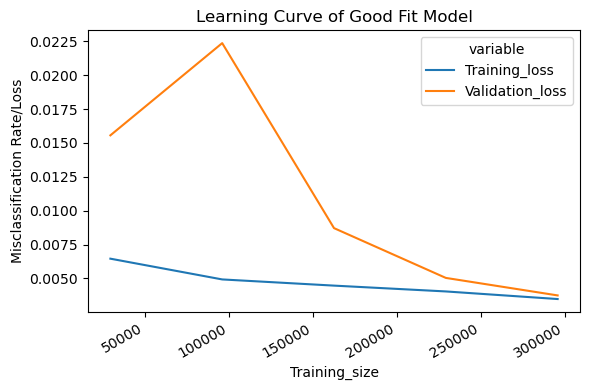

In [55]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)

In [109]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(params):
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
        'random_state': int(params['random_state']), 
        'reg_alpha': int(params['reg_alpha']),
        'reg_lambda': int(params['reg_lambda']),

        'min_child_weight': abs(float(params['min_child_weight'])),
    }
    
    HPOxgb = xgb.XGBClassifier( **params)
    HPOxgb.fit(X_train, y_train)
    y_pred = HPOxgb.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
    
    'random_state': hp.quniform('random_state', 10, 200, 10),
    'reg_alpha': hp.quniform('reg_alpha', 1, 10, 1),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1),

    'min_child_weight': hp.normal('min_child_weight', 0.01, 0.9),
}

bestxg = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(bestxg))

[07:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [110]:
%%time
HPOxgb = xgb.XGBClassifier(learning_rate=  0.5013977746859262, n_estimators = 35, max_depth = 86, random_state=123,
                             colsample_bytree=0.9234, min_child_samples=399, min_child_weight= 0.1
                              , num_leaves= 13, reg_alpha= 2, reg_lambda = 5, subsample= 0.855).fit(X_train, y_train)
HPOxgb_train = HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test, HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

[08:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.998573869998232
Precision of XGBoost: 0.9985751771298254
Recall of XGBoost: 0.998573869998232
Average F1 of XGBoost: 0.9985732067381877
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3095
        

In [112]:
%%time

HPOxgb = xgb.XGBClassifier(learning_rate= 0.3409620449079957, max_depth= 50, min_child_weight= 0.2230215264575676, 
                            n_estimators= 50, random_state= 190, reg_alpha= 5, reg_lambda= 6).fit(X_train, y_train)
HPOxgb_train = HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test, HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

[08:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9984795804113383
Precision of XGBoost: 0.9984808739807355
Recall of XGBoost: 0.9984795804113383
Average F1 of XGBoost: 0.9984789599422544
 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3095
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1920
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      

[08:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[09:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

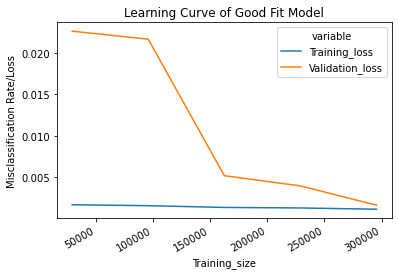

In [114]:
lcHPOxgb = learn_curve(X_train,y_train,1,HPOxgb) 
print_graph(lcHPOxgb)

In [117]:
%%time
HPOlight = lgb.LGBMClassifier(learning_rate=  0.09324023231693492, n_estimators =80, max_depth = 6, 
                              random_state=60, min_child_weight= 0.8279279287191909, reg_alpha= 1, reg_lambda = 8).fit(X_train,y_train)
HPOlight.fit(X_train, y_train)
HPOlight_train=HPOlight.predict(X_train)
HPOlight_test = HPOlight.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOlight_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOlight_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOlight_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOlight_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOlight_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOlight_test, average=None)))

Accuracy of LightGBM + Hyperparameter: 0.9984560080146149
Precision of LightGBM + Hyperparameter: 0.9984573705990964
Recall of LightGBM + Hyperparameter: 0.9984560080146149
Average F1 of LightGBM + Hyperparameter: 0.9984552759826968
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3095
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       1.00      1.00      1.00      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1920
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
        

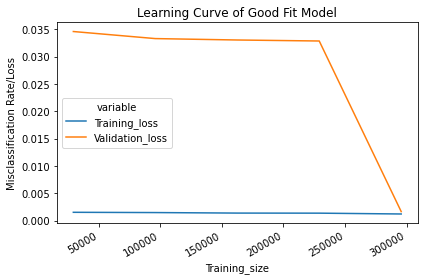

In [121]:
lcHPOlight = learn_curve(X_train,y_train,1,HPOlight) 
print_graph(lcHPOlight)

In [118]:
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.24393503372262373, n_estimators =80, max_depth = 7, 
                              random_state=140, reg_lambda = 6).fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.7959367	total: 1.23s	remaining: 1m 37s
1:	learn: 0.5377372	total: 2.49s	remaining: 1m 37s
2:	learn: 0.4019541	total: 3.78s	remaining: 1m 37s
3:	learn: 0.3199099	total: 5.05s	remaining: 1m 35s
4:	learn: 0.2681785	total: 6.33s	remaining: 1m 35s
5:	learn: 0.2252376	total: 7.7s	remaining: 1m 35s
6:	learn: 0.1924761	total: 9.06s	remaining: 1m 34s
7:	learn: 0.1650601	total: 10.6s	remaining: 1m 35s
8:	learn: 0.1420996	total: 12s	remaining: 1m 34s
9:	learn: 0.1262596	total: 13.3s	remaining: 1m 33s
10:	learn: 0.1115912	total: 14.7s	remaining: 1m 32s
11:	learn: 0.1019201	total: 16.1s	remaining: 1m 31s
12:	learn: 0.0927101	total: 17.4s	remaining: 1m 29s
13:	learn: 0.0880494	total: 18.8s	remaining: 1m 28s
14:	learn: 0.0802454	total: 20.2s	remaining: 1m 27s
15:	learn: 0.0764503	total: 21.6s	remaining: 1m 26s
16:	learn: 0.0713149	total: 23s	remaining: 1m 25s
17:	learn: 0.0658863	total: 24.4s	remaining: 1m 23s
18:	learn: 0.0632427	total: 25.8s	remaining: 1m 22s
19:	learn: 0.0593103	total:

Accuracy of LightGBM + Hyperparameter: 0.9963344923095055
Precision of LightGBM + Hyperparameter: 0.9963332039883372
Recall of LightGBM + Hyperparameter: 0.9963344923095055
Average F1 of LightGBM + Hyperparameter: 0.9963269924825306
 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3095
           1       1.00      1.00      1.00      5453
           2       1.00      1.00      1.00      4631
           3       1.00      1.00      1.00      5538
           4       0.99      1.00      0.99      2874
           5       1.00      1.00      1.00      2013
           6       1.00      1.00      1.00      1920
           7       1.00      1.00      1.00     10360
           8       1.00      1.00      1.00      3357
           9       1.00      1.00      1.00      1599
          10       1.00      1.00      1.00      1301
          11       1.00      1.00      1.00         2
          12       1.00      0.99      1.00      3903
        

0:	learn: 0.7012180	total: 1.01s	remaining: 1m 19s
1:	learn: 0.4763337	total: 2.14s	remaining: 1m 23s
2:	learn: 0.3742268	total: 3.32s	remaining: 1m 25s
3:	learn: 0.3065955	total: 4.34s	remaining: 1m 22s
4:	learn: 0.2547067	total: 5.41s	remaining: 1m 21s
5:	learn: 0.2125423	total: 6.48s	remaining: 1m 19s
6:	learn: 0.1848440	total: 7.52s	remaining: 1m 18s
7:	learn: 0.1584923	total: 8.59s	remaining: 1m 17s
8:	learn: 0.1366648	total: 9.67s	remaining: 1m 16s
9:	learn: 0.1218615	total: 10.8s	remaining: 1m 15s
10:	learn: 0.1109891	total: 11.8s	remaining: 1m 14s
11:	learn: 0.1008802	total: 12.9s	remaining: 1m 13s
12:	learn: 0.0912620	total: 14.1s	remaining: 1m 12s
13:	learn: 0.0813628	total: 15.1s	remaining: 1m 11s
14:	learn: 0.0758084	total: 16.3s	remaining: 1m 10s
15:	learn: 0.0684423	total: 17.3s	remaining: 1m 9s
16:	learn: 0.0639681	total: 18.5s	remaining: 1m 8s
17:	learn: 0.0594351	total: 19.6s	remaining: 1m 7s
18:	learn: 0.0575728	total: 20.7s	remaining: 1m 6s
19:	learn: 0.0557311	total

0:	learn: 0.6876048	total: 1.41s	remaining: 1m 51s
1:	learn: 0.4638921	total: 2.84s	remaining: 1m 50s
2:	learn: 0.3542451	total: 4.26s	remaining: 1m 49s
3:	learn: 0.2849837	total: 5.68s	remaining: 1m 47s
4:	learn: 0.2299787	total: 7.17s	remaining: 1m 47s
5:	learn: 0.1920189	total: 8.63s	remaining: 1m 46s
6:	learn: 0.1663218	total: 10s	remaining: 1m 44s
7:	learn: 0.1428653	total: 11.4s	remaining: 1m 42s
8:	learn: 0.1269674	total: 12.8s	remaining: 1m 41s
9:	learn: 0.1112252	total: 14.2s	remaining: 1m 39s
10:	learn: 0.1002367	total: 15.6s	remaining: 1m 38s
11:	learn: 0.0942419	total: 17s	remaining: 1m 36s
12:	learn: 0.0848204	total: 18.5s	remaining: 1m 35s
13:	learn: 0.0791048	total: 19.9s	remaining: 1m 33s
14:	learn: 0.0719719	total: 21.3s	remaining: 1m 32s
15:	learn: 0.0649427	total: 22.7s	remaining: 1m 30s
16:	learn: 0.0608120	total: 24.1s	remaining: 1m 29s
17:	learn: 0.0581581	total: 25.6s	remaining: 1m 28s
18:	learn: 0.0539025	total: 27s	remaining: 1m 26s
19:	learn: 0.0513507	total: 

0:	learn: 0.6862997	total: 1.43s	remaining: 1m 52s
1:	learn: 0.4917111	total: 2.97s	remaining: 1m 55s
2:	learn: 0.3761788	total: 4.38s	remaining: 1m 52s
3:	learn: 0.3088938	total: 5.86s	remaining: 1m 51s
4:	learn: 0.2516587	total: 7.26s	remaining: 1m 48s
5:	learn: 0.2119337	total: 8.69s	remaining: 1m 47s
6:	learn: 0.1771744	total: 10.1s	remaining: 1m 45s
7:	learn: 0.1507512	total: 11.7s	remaining: 1m 45s
8:	learn: 0.1367398	total: 13.2s	remaining: 1m 44s
9:	learn: 0.1208529	total: 14.7s	remaining: 1m 43s
10:	learn: 0.1092692	total: 16.1s	remaining: 1m 41s
11:	learn: 0.0963749	total: 17.6s	remaining: 1m 39s
12:	learn: 0.0898855	total: 19s	remaining: 1m 38s
13:	learn: 0.0822585	total: 20.5s	remaining: 1m 36s
14:	learn: 0.0772405	total: 21.9s	remaining: 1m 34s
15:	learn: 0.0712893	total: 23.3s	remaining: 1m 33s
16:	learn: 0.0651951	total: 24.8s	remaining: 1m 31s
17:	learn: 0.0622103	total: 26.2s	remaining: 1m 30s
18:	learn: 0.0590362	total: 27.7s	remaining: 1m 28s
19:	learn: 0.0553195	tot

0:	learn: 0.8234377	total: 234ms	remaining: 18.5s
1:	learn: 0.6159042	total: 495ms	remaining: 19.3s
2:	learn: 0.5007197	total: 754ms	remaining: 19.3s
3:	learn: 0.4110934	total: 1.01s	remaining: 19.2s
4:	learn: 0.3501223	total: 1.28s	remaining: 19.2s
5:	learn: 0.2969019	total: 1.54s	remaining: 19s
6:	learn: 0.2480283	total: 1.82s	remaining: 18.9s
7:	learn: 0.2155565	total: 2.1s	remaining: 18.9s
8:	learn: 0.1876609	total: 2.38s	remaining: 18.8s
9:	learn: 0.1682282	total: 2.72s	remaining: 19.1s
10:	learn: 0.1493395	total: 3s	remaining: 18.8s
11:	learn: 0.1358659	total: 3.27s	remaining: 18.5s
12:	learn: 0.1249163	total: 3.57s	remaining: 18.4s
13:	learn: 0.1166646	total: 3.88s	remaining: 18.3s
14:	learn: 0.1066711	total: 4.15s	remaining: 18s
15:	learn: 0.0971703	total: 4.41s	remaining: 17.6s
16:	learn: 0.0914073	total: 4.68s	remaining: 17.4s
17:	learn: 0.0862558	total: 4.96s	remaining: 17.1s
18:	learn: 0.0823943	total: 5.22s	remaining: 16.8s
19:	learn: 0.0806832	total: 5.48s	remaining: 16.4

3:	learn: 0.3075531	total: 3.28s	remaining: 1m 2s
4:	learn: 0.2560750	total: 4.08s	remaining: 1m 1s
5:	learn: 0.2135837	total: 4.88s	remaining: 1m
6:	learn: 0.1849237	total: 5.71s	remaining: 59.6s
7:	learn: 0.1593099	total: 6.54s	remaining: 58.8s
8:	learn: 0.1424377	total: 7.34s	remaining: 57.9s
9:	learn: 0.1252370	total: 8.15s	remaining: 57.1s
10:	learn: 0.1131164	total: 8.95s	remaining: 56.2s
11:	learn: 0.1017975	total: 9.74s	remaining: 55.2s
12:	learn: 0.0931379	total: 10.5s	remaining: 54.3s
13:	learn: 0.0842868	total: 11.4s	remaining: 53.5s
14:	learn: 0.0758186	total: 12.2s	remaining: 52.7s
15:	learn: 0.0701468	total: 13s	remaining: 51.8s
16:	learn: 0.0661927	total: 13.8s	remaining: 51s
17:	learn: 0.0650976	total: 14.6s	remaining: 50.1s
18:	learn: 0.0624923	total: 15.4s	remaining: 49.3s
19:	learn: 0.0581464	total: 16.2s	remaining: 48.5s
20:	learn: 0.0567600	total: 17s	remaining: 47.7s
21:	learn: 0.0546411	total: 17.8s	remaining: 46.9s
22:	learn: 0.0518956	total: 18.6s	remaining: 46

5:	learn: 0.2125423	total: 8.89s	remaining: 1m 49s
6:	learn: 0.1848440	total: 10.3s	remaining: 1m 47s
7:	learn: 0.1584923	total: 11.8s	remaining: 1m 45s
8:	learn: 0.1366648	total: 13.2s	remaining: 1m 44s
9:	learn: 0.1218615	total: 14.7s	remaining: 1m 42s
10:	learn: 0.1109891	total: 16.1s	remaining: 1m 40s
11:	learn: 0.1008802	total: 17.6s	remaining: 1m 39s
12:	learn: 0.0912620	total: 19s	remaining: 1m 38s
13:	learn: 0.0813628	total: 20.4s	remaining: 1m 36s
14:	learn: 0.0758084	total: 22s	remaining: 1m 35s
15:	learn: 0.0684423	total: 23.5s	remaining: 1m 33s
16:	learn: 0.0639681	total: 24.9s	remaining: 1m 32s
17:	learn: 0.0594351	total: 26.5s	remaining: 1m 31s
18:	learn: 0.0575728	total: 28.1s	remaining: 1m 30s
19:	learn: 0.0557311	total: 29.5s	remaining: 1m 28s
20:	learn: 0.0531882	total: 31s	remaining: 1m 27s
21:	learn: 0.0498462	total: 32.4s	remaining: 1m 25s
22:	learn: 0.0475833	total: 33.9s	remaining: 1m 23s
23:	learn: 0.0458350	total: 35.3s	remaining: 1m 22s
24:	learn: 0.0437852	to

6:	learn: 0.2075245	total: 3.88s	remaining: 40.5s
7:	learn: 0.1847226	total: 4.45s	remaining: 40.1s
8:	learn: 0.1626976	total: 5.01s	remaining: 39.5s
9:	learn: 0.1478274	total: 5.55s	remaining: 38.8s
10:	learn: 0.1304053	total: 6.09s	remaining: 38.2s
11:	learn: 0.1194563	total: 6.63s	remaining: 37.6s
12:	learn: 0.1116971	total: 7.15s	remaining: 36.8s
13:	learn: 0.1023737	total: 7.7s	remaining: 36.3s
14:	learn: 0.0945322	total: 8.24s	remaining: 35.7s
15:	learn: 0.0896819	total: 8.78s	remaining: 35.1s
16:	learn: 0.0820140	total: 9.31s	remaining: 34.5s
17:	learn: 0.0748288	total: 9.88s	remaining: 34s
18:	learn: 0.0707453	total: 10.4s	remaining: 33.4s
19:	learn: 0.0657056	total: 11s	remaining: 32.9s
20:	learn: 0.0630484	total: 11.5s	remaining: 32.3s
21:	learn: 0.0601479	total: 12s	remaining: 31.7s
22:	learn: 0.0582189	total: 12.6s	remaining: 31.1s
23:	learn: 0.0560993	total: 13.1s	remaining: 30.6s
24:	learn: 0.0532182	total: 13.6s	remaining: 30s
25:	learn: 0.0512640	total: 14.2s	remaining:

9:	learn: 0.1115695	total: 11.3s	remaining: 1m 18s
10:	learn: 0.1017926	total: 12.4s	remaining: 1m 17s
11:	learn: 0.0896053	total: 13.4s	remaining: 1m 16s
12:	learn: 0.0832157	total: 14.5s	remaining: 1m 14s
13:	learn: 0.0755891	total: 15.6s	remaining: 1m 13s
14:	learn: 0.0701725	total: 16.7s	remaining: 1m 12s
15:	learn: 0.0654277	total: 17.8s	remaining: 1m 11s
16:	learn: 0.0629787	total: 18.8s	remaining: 1m 9s
17:	learn: 0.0611655	total: 19.9s	remaining: 1m 8s
18:	learn: 0.0577219	total: 21s	remaining: 1m 7s
19:	learn: 0.0542811	total: 22.2s	remaining: 1m 6s
20:	learn: 0.0514887	total: 23.2s	remaining: 1m 5s
21:	learn: 0.0490477	total: 24.3s	remaining: 1m 4s
22:	learn: 0.0463898	total: 25.4s	remaining: 1m 3s
23:	learn: 0.0446415	total: 26.5s	remaining: 1m 1s
24:	learn: 0.0428813	total: 27.7s	remaining: 1m
25:	learn: 0.0413468	total: 28.9s	remaining: 60s
26:	learn: 0.0399735	total: 30.1s	remaining: 59.1s
27:	learn: 0.0391237	total: 31.3s	remaining: 58.1s
28:	learn: 0.0382019	total: 32.4

10:	learn: 0.1500733	total: 2.82s	remaining: 17.7s
11:	learn: 0.1386696	total: 3.08s	remaining: 17.5s
12:	learn: 0.1269120	total: 3.35s	remaining: 17.2s
13:	learn: 0.1160105	total: 3.6s	remaining: 17s
14:	learn: 0.1110061	total: 3.85s	remaining: 16.7s
15:	learn: 0.1048391	total: 4.11s	remaining: 16.4s
16:	learn: 0.0994132	total: 4.37s	remaining: 16.2s
17:	learn: 0.0948239	total: 4.63s	remaining: 16s
18:	learn: 0.0901765	total: 4.9s	remaining: 15.7s
19:	learn: 0.0865461	total: 5.16s	remaining: 15.5s
20:	learn: 0.0820897	total: 5.43s	remaining: 15.2s
21:	learn: 0.0772640	total: 5.69s	remaining: 15s
22:	learn: 0.0745038	total: 5.95s	remaining: 14.7s
23:	learn: 0.0727911	total: 6.21s	remaining: 14.5s
24:	learn: 0.0713664	total: 6.47s	remaining: 14.2s
25:	learn: 0.0694580	total: 6.72s	remaining: 14s
26:	learn: 0.0664652	total: 6.98s	remaining: 13.7s
27:	learn: 0.0653229	total: 7.23s	remaining: 13.4s
28:	learn: 0.0637553	total: 7.49s	remaining: 13.2s
29:	learn: 0.0620676	total: 7.75s	remaini

13:	learn: 0.0859105	total: 11.6s	remaining: 54.8s
14:	learn: 0.0818819	total: 12.4s	remaining: 53.9s
15:	learn: 0.0736599	total: 13.3s	remaining: 53.1s
16:	learn: 0.0679720	total: 14.1s	remaining: 52.2s
17:	learn: 0.0649790	total: 14.9s	remaining: 51.3s
18:	learn: 0.0620527	total: 15.7s	remaining: 50.4s
19:	learn: 0.0601412	total: 16.5s	remaining: 49.5s
20:	learn: 0.0562070	total: 17.3s	remaining: 48.7s
21:	learn: 0.0532610	total: 18.1s	remaining: 47.8s
22:	learn: 0.0504011	total: 18.9s	remaining: 47s
23:	learn: 0.0477758	total: 19.8s	remaining: 46.1s
24:	learn: 0.0460923	total: 20.6s	remaining: 45.3s
25:	learn: 0.0445948	total: 21.4s	remaining: 44.4s
26:	learn: 0.0441177	total: 22.2s	remaining: 43.5s
27:	learn: 0.0436233	total: 23s	remaining: 42.7s
28:	learn: 0.0421202	total: 23.8s	remaining: 41.9s
29:	learn: 0.0411984	total: 24.6s	remaining: 41s
30:	learn: 0.0410679	total: 25.4s	remaining: 40.2s
31:	learn: 0.0396899	total: 26.2s	remaining: 39.3s
32:	learn: 0.0393771	total: 27s	remai

15:	learn: 0.0649427	total: 23.6s	remaining: 1m 34s
16:	learn: 0.0608120	total: 25s	remaining: 1m 32s
17:	learn: 0.0581581	total: 26.5s	remaining: 1m 31s
18:	learn: 0.0539025	total: 28s	remaining: 1m 29s
19:	learn: 0.0513507	total: 29.4s	remaining: 1m 28s
20:	learn: 0.0485773	total: 30.9s	remaining: 1m 26s
21:	learn: 0.0460458	total: 32.3s	remaining: 1m 25s
22:	learn: 0.0441011	total: 33.8s	remaining: 1m 23s
23:	learn: 0.0419645	total: 35.3s	remaining: 1m 22s
24:	learn: 0.0406463	total: 36.7s	remaining: 1m 20s
25:	learn: 0.0391633	total: 38.3s	remaining: 1m 19s
26:	learn: 0.0379749	total: 39.7s	remaining: 1m 17s
27:	learn: 0.0368169	total: 41.2s	remaining: 1m 16s
28:	learn: 0.0350780	total: 42.6s	remaining: 1m 14s
29:	learn: 0.0338847	total: 44.1s	remaining: 1m 13s
30:	learn: 0.0329647	total: 45.5s	remaining: 1m 11s
31:	learn: 0.0320255	total: 47.1s	remaining: 1m 10s
32:	learn: 0.0311451	total: 48.6s	remaining: 1m 9s
33:	learn: 0.0306132	total: 50.1s	remaining: 1m 7s
34:	learn: 0.02990

17:	learn: 0.0677769	total: 9.71s	remaining: 33.4s
18:	learn: 0.0645015	total: 10.3s	remaining: 32.9s
19:	learn: 0.0627288	total: 10.8s	remaining: 32.4s
20:	learn: 0.0601034	total: 11.3s	remaining: 31.9s
21:	learn: 0.0576480	total: 11.9s	remaining: 31.3s
22:	learn: 0.0548383	total: 12.4s	remaining: 30.8s
23:	learn: 0.0534048	total: 13s	remaining: 30.3s
24:	learn: 0.0518273	total: 13.5s	remaining: 29.7s
25:	learn: 0.0501868	total: 14.1s	remaining: 29.2s
26:	learn: 0.0499752	total: 14.6s	remaining: 28.6s
27:	learn: 0.0486964	total: 15.1s	remaining: 28.1s
28:	learn: 0.0476037	total: 15.7s	remaining: 27.6s
29:	learn: 0.0468337	total: 16.2s	remaining: 27.1s
30:	learn: 0.0454269	total: 16.8s	remaining: 26.6s
31:	learn: 0.0435484	total: 17.3s	remaining: 26s
32:	learn: 0.0426946	total: 17.9s	remaining: 25.5s
33:	learn: 0.0420901	total: 18.4s	remaining: 24.9s
34:	learn: 0.0408930	total: 19s	remaining: 24.4s
35:	learn: 0.0402613	total: 19.4s	remaining: 23.7s
36:	learn: 0.0391766	total: 19.9s	rem

19:	learn: 0.0532086	total: 21.6s	remaining: 1m 4s
20:	learn: 0.0507131	total: 22.7s	remaining: 1m 3s
21:	learn: 0.0486960	total: 23.8s	remaining: 1m 2s
22:	learn: 0.0469620	total: 24.9s	remaining: 1m 1s
23:	learn: 0.0450264	total: 25.9s	remaining: 1m
24:	learn: 0.0432451	total: 27s	remaining: 59.4s
25:	learn: 0.0401913	total: 28.1s	remaining: 58.4s
26:	learn: 0.0394334	total: 29.3s	remaining: 57.4s
27:	learn: 0.0382080	total: 30.4s	remaining: 56.4s
28:	learn: 0.0370692	total: 31.5s	remaining: 55.4s
29:	learn: 0.0355939	total: 32.6s	remaining: 54.4s
30:	learn: 0.0351876	total: 33.7s	remaining: 53.3s
31:	learn: 0.0340561	total: 34.9s	remaining: 52.4s
32:	learn: 0.0331737	total: 36.1s	remaining: 51.4s
33:	learn: 0.0317832	total: 37.2s	remaining: 50.3s
34:	learn: 0.0306279	total: 38.3s	remaining: 49.2s
35:	learn: 0.0301301	total: 39.3s	remaining: 48s
36:	learn: 0.0300476	total: 40.4s	remaining: 47s
37:	learn: 0.0289805	total: 41.5s	remaining: 45.9s
38:	learn: 0.0282307	total: 42.6s	remain

20:	learn: 0.0770623	total: 5.48s	remaining: 15.4s
21:	learn: 0.0726100	total: 5.75s	remaining: 15.2s
22:	learn: 0.0703599	total: 6.02s	remaining: 14.9s
23:	learn: 0.0698190	total: 6.28s	remaining: 14.6s
24:	learn: 0.0673024	total: 6.54s	remaining: 14.4s
25:	learn: 0.0656517	total: 6.8s	remaining: 14.1s
26:	learn: 0.0645463	total: 7.06s	remaining: 13.9s
27:	learn: 0.0620676	total: 7.32s	remaining: 13.6s
28:	learn: 0.0590435	total: 7.59s	remaining: 13.3s
29:	learn: 0.0583895	total: 7.86s	remaining: 13.1s
30:	learn: 0.0575266	total: 8.12s	remaining: 12.8s
31:	learn: 0.0565144	total: 8.38s	remaining: 12.6s
32:	learn: 0.0559589	total: 8.64s	remaining: 12.3s
33:	learn: 0.0549921	total: 8.9s	remaining: 12s
34:	learn: 0.0536154	total: 9.16s	remaining: 11.8s
35:	learn: 0.0527313	total: 9.42s	remaining: 11.5s
36:	learn: 0.0520433	total: 9.68s	remaining: 11.2s
37:	learn: 0.0506095	total: 9.94s	remaining: 11s
38:	learn: 0.0500046	total: 10.2s	remaining: 10.7s
39:	learn: 0.0497990	total: 10.4s	rem

23:	learn: 0.0481209	total: 19.8s	remaining: 46.3s
24:	learn: 0.0463687	total: 20.6s	remaining: 45.4s
25:	learn: 0.0444057	total: 21.4s	remaining: 44.5s
26:	learn: 0.0428747	total: 22.2s	remaining: 43.6s
27:	learn: 0.0409374	total: 23s	remaining: 42.7s
28:	learn: 0.0396433	total: 23.8s	remaining: 41.9s
29:	learn: 0.0383797	total: 24.6s	remaining: 41s
30:	learn: 0.0375950	total: 25.4s	remaining: 40.1s
31:	learn: 0.0369045	total: 26.2s	remaining: 39.2s
32:	learn: 0.0360690	total: 26.9s	remaining: 38.4s
33:	learn: 0.0350442	total: 27.7s	remaining: 37.5s
34:	learn: 0.0347489	total: 28.5s	remaining: 36.7s
35:	learn: 0.0345400	total: 29.3s	remaining: 35.8s
36:	learn: 0.0331165	total: 30.1s	remaining: 35s
37:	learn: 0.0324682	total: 30.9s	remaining: 34.2s
38:	learn: 0.0317661	total: 31.7s	remaining: 33.3s
39:	learn: 0.0309715	total: 32.5s	remaining: 32.5s
40:	learn: 0.0297052	total: 33.3s	remaining: 31.7s
41:	learn: 0.0291432	total: 34.1s	remaining: 30.8s
42:	learn: 0.0282540	total: 34.9s	rem

24:	learn: 0.0390101	total: 35.8s	remaining: 1m 18s
25:	learn: 0.0378514	total: 37.2s	remaining: 1m 17s
26:	learn: 0.0367726	total: 38.6s	remaining: 1m 15s
27:	learn: 0.0357013	total: 40s	remaining: 1m 14s
28:	learn: 0.0343249	total: 41.4s	remaining: 1m 12s
29:	learn: 0.0337364	total: 42.8s	remaining: 1m 11s
30:	learn: 0.0325532	total: 44.2s	remaining: 1m 9s
31:	learn: 0.0310512	total: 45.7s	remaining: 1m 8s
32:	learn: 0.0303930	total: 47.1s	remaining: 1m 7s
33:	learn: 0.0293369	total: 48.5s	remaining: 1m 5s
34:	learn: 0.0290779	total: 49.9s	remaining: 1m 4s
35:	learn: 0.0282354	total: 51.3s	remaining: 1m 2s
36:	learn: 0.0274711	total: 52.7s	remaining: 1m 1s
37:	learn: 0.0264268	total: 54.1s	remaining: 59.8s
38:	learn: 0.0258637	total: 55.5s	remaining: 58.4s
39:	learn: 0.0253554	total: 56.9s	remaining: 56.9s
40:	learn: 0.0246262	total: 58.4s	remaining: 55.5s
41:	learn: 0.0242400	total: 59.8s	remaining: 54.1s
42:	learn: 0.0236768	total: 1m 1s	remaining: 52.7s
43:	learn: 0.0234612	total:

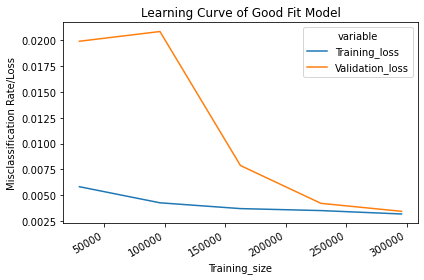

In [119]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)